In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dabl
import warnings
warnings.filterwarnings('ignore')

In [2]:
#plot setting
sns.set_context('notebook') 
sns.set_style('ticks') 
plot_colors = ['#4E79A7','#F28E2C','#E15759','#76B7B2','#59A14F', 
          '#EDC949','#AF7AA1','#FF9DA7','#9C755F','#BAB0AB']
sns.set_palette(plot_colors)
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,9)

# Data Understanding

In [3]:
train_original = pd.read_csv ('train.csv')
#set the first column of test set as index
test_original = pd.read_csv ('test.csv',index_col = 0) 
train_original.head()

name  \
0     Brand New House with Private Bathroom Miranda   
1     Single bedroom apartment in heart of Randwick   
2   Couples stylish retreat 10 mins to Sydney  city   
3         Manly Retreat with Sweeping Harbour Views   
4  Cozy bedroom just 5 min walking to Dee Why beach   

                                             summary  \
0  New house built in (Phone number hidden by Air...   
1  Furnished, single bedroom apartment, Bedroom, ...   
2  Stylish Victorian terrace. 1 king size bed and...   
3  This stunning coastal retreat is a few metres ...   
4  Our place is a cozy and light apartment, just ...   

                                               space  \
0  Guests are welcomed to use all amenities avail...   
1                                                NaN   
2  Bedroom king size bed ,bathroom, lounge, dinin...   
3  2 Bedroom Scandinavian inspired beach apartmen...   
4  If it's necessary we can let a extra kids matt...   

                                         description experiences_offered  \
0  New house built in (Phone number hidden by Air...                none   
1  Furnished, single bedroom apartment, Bedroom, ...                none   
2  Stylish Victorian terrace. 1 king size bed and...                none   
3  This stunning coastal retreat is a few metres ...                none   
4  Our place is a cozy and light apartment, just ...                none   

                               neighborhood_overview  \
0  There’s a massive Westfield shopping centre ne...   
1  Randwick junction is at 5 minutes walk with al...   
2  7 mins walk to train station, 1 stop to thrivi...   
3  Fairlight is a calm harbourside neighbourhood ...   
4  Our building has just 8 suits, so it's pretty ...   

                                               notes  \
0  1, This is not the only room in the house bein...   
1                                                NaN   
2  If staying on Sunday night please put garbage ...   
3                                                NaN   
4                                                NaN   

                                             transit  \
0  Miranda train station is about 10-15 mins walk...   
1  Al the major bus stops to Sydney CBD, Bondi Be...   
2  Parramatta road 2 minutes buses to everywhere,...   
3  A flat water beach with ocean pool is located ...   
4  If you come by bus from Manly, you can get off...   

                                              access  \
0  Family area, living area, laundry area, backya...   
1                                                NaN   
2        The whole house except for 2 private rooms.   
3  Full apartment including balcony, washing mach...   
4  We also offer all kitchen aplliance, beach cha...   

                                         interaction  ...  \
0  I don’t personally live in the house anymore a...  ...   
1      Host 'll be available 24/7 on call and nearby  ...   
2   Available for questions by email, phone or text.  ...   
3  Hosts are contactable via text message but may...  ...   
4                                                NaN  ...   

  is_business_travel_ready          cancellation_policy  \
0                        f  strict_14_with_grace_period   
1                        f  strict_14_with_grace_period   
2                        f  strict_14_with_grace_period   
3                        f  strict_14_with_grace_period   
4                        f                     flexible   

  require_guest_profile_picture require_guest_phone_verification  \
0                             f                                f   
1                             f                                f   
2                             f                                f   
3                             f                                f   
4                             f                                f   

  calculated_host_listings_count calculated_host_listings_count_entire_homes  \
0                         

In [4]:
print('size of original training data is',train_original.shape)
print('size of original test data is',test_original.shape)

size of original training data is (10635, 83)
size of original test data is (24818, 82)


# 1. Data Cleaning

## 1.1 Data cleaning via dabl

In [5]:
from dabl import detect_types
train_original_types = detect_types (train_original)
train_original_types

continuous  dirty_float  \
name                                               False        False   
summary                                            False        False   
space                                              False        False   
description                                        False        False   
experiences_offered                                False        False   
...                                                  ...          ...   
calculated_host_listings_count_entire_homes        False        False   
calculated_host_listings_count_private_rooms       False        False   
calculated_host_listings_count_shared_rooms        False        False   
reviews_per_month                                   True        False   
price                                              False        False   

                                              low_card_int  categorical  \
name                                                 False        False   
summary                                              False        False   
space                                                False        False   
description                                          False        False   
experiences_offered                                  False        False   
...                                                    ...          ...   
calculated_host_listings_count_entire_homes           True        False   
calculated_host_listings_count_private_rooms          True        False   
calculated_host_listings_count_shared_rooms          False        False   
reviews_per_month                                    False        False   
price                                                False        False   

                                               date  free_string  useless  
name                                          False         True    False  
summary                                       False         True    False  
space                                         False         True    False  
description                                   False         True    False  
experiences_offered                           False        False     True  
...                                             ...          ...      ...  
calculated_host_listings_count_entire_homes   False        False    False  
calculated_host_listings_count_private_rooms  False        False    False  
calculated_host_listings_count_shared_rooms   False        False     True  
reviews_per_month                             False        False    False  
price                                         False         True    False  

[83 rows x 7 columns]

### 1.1.1 Useless variable

In [6]:
useless_predictors = train_original_types[train_original_types['useless']== True]
useless_predictors

continuous  dirty_float  \
experiences_offered                               False        False   
bed_type                                          False        False   
requires_license                                  False        False   
is_business_travel_ready                          False        False   
require_guest_profile_picture                     False        False   
require_guest_phone_verification                  False        False   
calculated_host_listings_count_shared_rooms       False        False   

                                             low_card_int  categorical   date  \
experiences_offered                                 False        False  False   
bed_type                                            False        False  False   
requires_license                                    False        False  False   
is_business_travel_ready                            False        False  False   
require_guest_profile_picture                       False        False  False   
require_guest_phone_verification                    False        False  False   
calculated_host_listings_count_shared_rooms         False        False  False   

                                             free_string  useless  
experiences_offered                                False     True  
bed_type                                           False     True  
requires_license                                   False     True  
is_business_travel_ready                           False     True  
require_guest_profile_picture                      False     True  
require_guest_phone_verification                   False     True  
calculated_host_listings_count_shared_rooms        False     True

In [7]:
train_original['calculated_host_listings_count_shared_rooms'].value_counts()

0     10513
1        85
2        18
4         9
31        4
3         2
17        2
6         1
5         1
Name: calculated_host_listings_count_shared_rooms, dtype: int64

In [8]:
#no much variation, can be directly deleted
useless_feature = useless_predictors.index.tolist()
for feature in useless_feature:
    print(feature)
    print(train_original[feature].value_counts())
    print('----------------------------')

experiences_offered
none    10635
Name: experiences_offered, dtype: int64
----------------------------
bed_type
Real Bed         10595
Pull-out Sofa       28
Futon               10
Couch                2
Name: bed_type, dtype: int64
----------------------------
requires_license
f    10635
Name: requires_license, dtype: int64
----------------------------
is_business_travel_ready
f    10635
Name: is_business_travel_ready, dtype: int64
----------------------------
require_guest_profile_picture
f    10583
t       52
Name: require_guest_profile_picture, dtype: int64
----------------------------
require_guest_phone_verification
f    10569
t       66
Name: require_guest_phone_verification, dtype: int64
----------------------------
calculated_host_listings_count_shared_rooms
0     10513
1        85
2        18
4         9
31        4
3         2
17        2
6         1
5         1
Name: calculated_host_listings_count_shared_rooms, dtype: int64
----------------------------


In [9]:
train_dabl = train_original.drop(useless_predictors.index,axis = 1)
test_dabl = test_original.drop(useless_predictors.index,axis = 1)

In [10]:
train_dabl.shape

(10635, 76)

In [11]:
test_dabl.shape

(24818, 75)

### 1.1.2 Dirty float variable

In [12]:
dirty_float_predictors = train_original_types[train_original_types['dirty_float']== True]
dirty_float_predictors

continuous  dirty_float  low_card_int  categorical   date  \
zipcode       False         True         False        False  False   

         free_string  useless  
zipcode        False    False

In [13]:
#make zipcode to be a numerical value and if it contains string value then becomes a nan
train_original['zipcode'] = pd.to_numeric(train_original['zipcode'],errors = 'coerce')
train_original['zipcode'].dropna()

0        2228.0
1        2031.0
2        2048.0
3        2094.0
4        2099.0
          ...  
10630    2026.0
10631    2026.0
10632    2017.0
10633    2026.0
10634    2196.0
Name: zipcode, Length: 10596, dtype: float64

## 1.2 Data cleaning via profile report

In [14]:
#from pandas_profiling import ProfileReport

In [15]:
train_profile = ProfileReport(train_dabl)
train_profile.to_file('train_output_profile.html')

### 1.2.1 Highly-correlated variable

In [16]:
# drop predictors that are highly correlated with other predictors to avoid multicollinearity
high_corr_predictors = ['host_total_listings_count','minimum_minimum_nights','maximum_minimum_nights',
                             'maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','availability_60',
                             'availability_90','calculated_host_listings_count','calculated_host_listings_count_entire_homes']
train_dabl = train_dabl.drop(high_corr_predictors, axis = 1)
test_dabl = test_dabl.drop(high_corr_predictors, axis = 1)

In [17]:
train_dabl.shape

(10635, 66)

In [18]:
test_dabl.shape

(24818, 65)

## 1.3 Data Cleaning via Oberservation

### 1.3.1 Highly-correlated variable

In [19]:
#summary is similar to the description
#zipcode can be reflected from neighbourhood or smart location, the information is repeated
#street, neighbourhood, smart_location,city are repeated from neighbourhood_cleansed
#host_location is repeated from host_neighbourhood
train_dabl = train_dabl.drop(['summary','street','neighbourhood','smart_location','city','zipcode','host_location'],axis =1)
test_dabl = test_dabl.drop(['summary','street','neighbourhood','smart_location','city','zipcode','host_location'],axis =1)

### 1.3.2 Irrelavent variable

In [20]:
#host_id is unique for every host, the changes of which will not affect the house's price
train_dabl = train_dabl.drop(['host_id'],axis =1)
test_dabl = test_dabl.drop(['host_id'],axis =1)

### 1.3.3 Variables with missing values

#### 1.3.3.1 Visualization of Missing Values

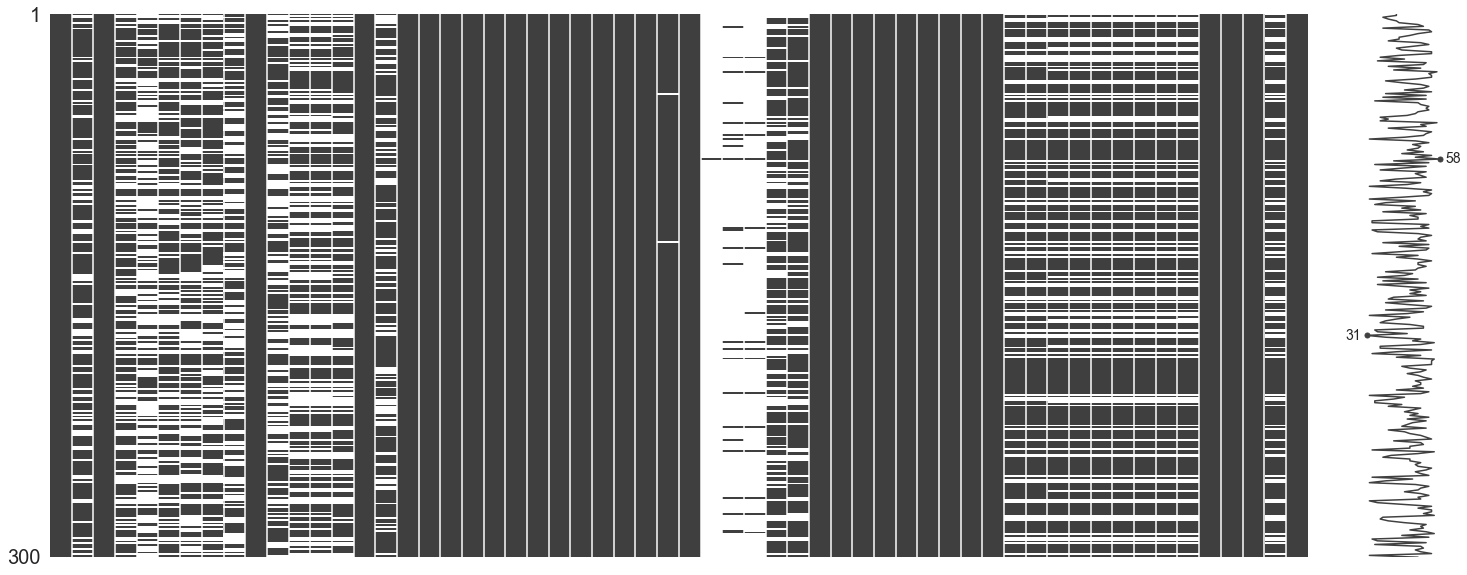

In [21]:
import missingno as msno
msno.matrix(train_dabl.sample(300))

plt.savefig('matrix of missing values for the first 300 observations')
plt.show()

#### 1.3.3.2 Missing value rate

In [22]:
train_missing_value = train_dabl.isnull().sum().sort_values(ascending = False)
train_missing_value_rate = train_missing_value/np.shape(train_dabl)[0]
test_missing_value = test_dabl.isnull().sum().sort_values(ascending = False)
test_missing_value_rate = test_missing_value/np.shape(test_dabl)[0]

train_missing_rates = pd.DataFrame.from_dict({'training data':train_missing_value_rate})
test_missing_rates = pd.DataFrame.from_dict({'test data':test_missing_value_rate})
combined_missing_rates = train_missing_rates.join(test_missing_rates)
combined_missing_rates

training data  test data
square_feet                                        0.994734   0.995245
monthly_discount                                   0.953268   0.952736
weekly_discount                                    0.921956   0.921267
notes                                              0.580442   0.578894
host_about                                         0.449835   0.452494
access                                             0.428397   0.426142
host_response_rate                                 0.420498   0.420018
host_response_time                                 0.420498   0.420018
house_rules                                        0.417772   0.412644
interaction                                        0.383075   0.386453
neighborhood_overview                              0.344335   0.343098
transit                                            0.332769   0.332944
security_deposit_perc                              0.324495   0.319325
host_acceptance_rate                               0.323460   0.323072
host_neighbourhood                                 0.299859   0.295149
review_scores_checkin                              0.273907   0.278306
review_scores_location                             0.273813   0.278266
review_scores_value                                0.273813   0.278508
review_scores_accuracy                             0.273531   0.277943
review_scores_communication                        0.272967   0.277702
review_scores_cleanliness                          0.272873   0.277581
review_scores_rating                               0.272214   0.277097
space                                              0.267231   0.264647
reviews_per_month                                  0.243818   0.248690
last_review                                        0.243818   0.248690
first_review                                       0.243818   0.248690
cleaning_fee_perc                                  0.236013   0.235031
beds                                               0.006864   0.006608
bedrooms                                           0.000752   0.000484
bathrooms                                          0.000282   0.000242
host_since                                         0.000000   0.000000
neighbourhood_cleansed                             0.000000   0.000000
host_is_superhost                                  0.000000   0.000000
description                                        0.000000   0.000000
host_listings_count                                0.000000   0.000000
host_verifications                                 0.000000   0.000000
host_identity_verified                             0.000000   0.000000
price                                              0.000000        NaN
latitude                                           0.000000   0.000000
longitude                                          0.000000   0.000000
calculated_host_listings_count_private_rooms       0.000000   0.000000
cancellation_policy                                0.000000   0.000000
instant_bookable                                   0.000000   0.000000
number_of_reviews_ltm                              0.000000   0.000000
number_of_reviews                                  0.000000   0.000000
availability_365                                   0.000000   0.000000
availability_30                                    0.000000   0.000000
minimum_maximum_nights                             0.000000   0.000000
maximum_nights                                     0.000000   0.000000
minimum_nights                                     0.000000   0.000000
extra_people_perc                                  0.000000   0.000000
guests_included                                    0.000000   0.000000
amenities                                          0.000000   0.000000
accommodates                                       0.000000   0.000000
room_type                                          0.000000   0.000000
property_type                                      0.000000   0.000000

In [23]:
combined_missing_rates.to_excel('Missing_rates.xlsx')

#### 1.3.3.3 Processing Missing values

In [24]:
train_filled = train_dabl.copy()
test_filled = test_dabl.copy()

##### predictors with high missing value rate

In [25]:
train_filled = train_filled.drop(['square_feet','monthly_discount','weekly_discount'],axis = 1)
test_filled = test_filled.drop(['square_feet','monthly_discount','weekly_discount'],axis = 1)

##### textual predictors

In [26]:
#for the textual predictors with no information-->file nan to 1 and file non-nan to 0
file_0_col = ['notes','host_about','access','house_rules','interaction','host_neighbourhood','space']
train_filled[file_0_col] = train_filled[file_0_col].isnull().astype(int)
test_filled[file_0_col] = test_filled[file_0_col].isnull().astype(int)

In [27]:
#for the textural predictors with some information-->fill'none' 
fillna_none_col =['neighborhood_overview','transit','host_response_time']
train_filled[fillna_none_col] = train_filled[fillna_none_col].fillna('none')
test_filled[fillna_none_col] = test_filled[fillna_none_col].fillna('none')

#for the textural predictors with some information-->fill with other information from Airbnb
train_filled['cancellation_policy'] = train_filled['cancellation_policy'].fillna('moderate')
test_filled['cancellation_policy'] = test_filled['cancellation_policy'].fillna('moderate')

##### numerical predictors

In [28]:
#for the numerical predictors with no information--> fill with '0'（0 means nothing）
fillna_0_col =['reviews_per_month', 'host_response_rate','host_acceptance_rate','cleaning_fee_perc']
train_filled[fillna_0_col] = train_filled[fillna_0_col].fillna(0)
test_filled[fillna_0_col] = test_filled[fillna_0_col].fillna(0)

In [29]:
#numerical predictors with some information --> fill with its averge value
train_filled['security_deposit_perc'] = train_filled['security_deposit_perc'].fillna(train_filled['security_deposit_perc'].mean())
test_filled['security_deposit_perc'] = test_filled['security_deposit_perc'].fillna(test_filled['security_deposit_perc'].mean())

In [30]:
# using interpolation to fill the missing value for beds/bedrooms/bathrooms
fillna_inter_col = ['beds','bedrooms','bathrooms']
train_filled[fillna_inter_col] = train_filled[fillna_inter_col].interpolate()
test_filled[fillna_inter_col] = test_filled[fillna_inter_col].interpolate()

In [31]:
# using predictors as training set,using its corresponding missing values as test set
# using training set to fit the model and then make predictions on test set
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

predictors = ['review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
             'review_scores_checkin','review_scores_communication','review_scores_location',
             'review_scores_value']
x_train = train_filled[predictors]
impute = IterativeImputer()
impute.fit(x_train)
train_filled[predictors] = impute.transform(train_filled[predictors])
test_filled[predictors] = impute.transform(test_filled[predictors])
####limitation: could cause overfitting (can be mentioned in the limitation part to have more critical thinking)

In [32]:
#transfering datetime predictors to fill its missing value
train_filled['last_review'] = pd.to_datetime(train_filled['last_review'])
train_filled['first_review'] = pd.to_datetime(train_filled['first_review'])
train_filled['review_days'] = (train_filled['last_review']-train_filled['first_review']).dt.days
train_filled['review_days'].fillna(0,inplace = True)
train_filled = train_filled.drop(['last_review','first_review'], axis = 1)

test_filled['last_review'] = pd.to_datetime(test_filled['last_review'])
test_filled['first_review'] = pd.to_datetime(test_filled['first_review'])
test_filled['review_days'] = (test_filled['last_review']-test_filled['first_review']).dt.days
test_filled['review_days'].fillna(0,inplace = True)
test_filled = test_filled.drop(['last_review','first_review'], axis = 1)

In [33]:
train_filled.isnull().sum().sort_values(ascending = False)

review_days                                     0
host_acceptance_rate                            0
room_type                                       0
property_type                                   0
is_location_exact                               0
longitude                                       0
latitude                                        0
neighbourhood_cleansed                          0
host_identity_verified                          0
host_verifications                              0
host_listings_count                             0
host_neighbourhood                              0
host_is_superhost                               0
host_response_rate                              0
price                                           0
host_response_time                              0
host_about                                      0
host_since                                      0
house_rules                                     0
interaction                                     0


### 1.3.4 Predictors with Other Format

In [34]:
#Price contains ',' and '$' Symbol
train_filled['price'] = train_filled['price'].apply(lambda x: float(x.split('$')[1].replace(',','')))

In [35]:
#host acceptance rate and host reponse rate contain '%' symbol and need to be made as float 
train_filled['host_acceptance_rate'] = train_filled['host_acceptance_rate'].astype(str).apply(lambda x: x.replace('%','')).astype(float)
train_filled['host_response_rate'] = train_filled['host_response_rate'].astype(str).apply(lambda x: x.replace('%','')).astype(float)

test_filled['host_acceptance_rate'] = test_filled['host_acceptance_rate'].astype(str).apply(lambda x: x.replace('%','')).astype(float)
test_filled['host_response_rate'] = test_filled['host_response_rate'].astype(str).apply(lambda x: x.replace('%','')).astype(float)

In [36]:
#change host_since to days for better EDA
today=pd.to_datetime('2020-12-31',format="%Y-%m-%d")

train_dabl['host_since'] = pd.to_datetime(train_dabl['host_since'])
train_filled['host_since'] = train_dabl['host_since'].apply(lambda x: today - x ).dt.days


test_dabl['host_since'] = pd.to_datetime(test_dabl['host_since'])
test_filled['host_since'] = test_dabl['host_since'].apply(lambda x: today - x ).dt.days

In [37]:
train_filled.shape

(10635, 54)

In [38]:
test_filled.shape

(24818, 53)

# 2. EDA

## 2.1 data types

### 2.1.1 Seperate numerical and nominal variables 

In [39]:
train_eda = train_filled.copy()

In [40]:
numerical_variables = list(train_eda.select_dtypes(include = ['int64','int32','float64']))
nominal_variables = list(train_eda.select_dtypes(include = ['object']))

In [41]:
numerical_variables

['space',
 'notes',
 'access',
 'interaction',
 'house_rules',
 'host_since',
 'host_about',
 'host_response_rate',
 'host_acceptance_rate',
 'host_neighbourhood',
 'host_listings_count',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'security_deposit_perc',
 'cleaning_fee_perc',
 'guests_included',
 'extra_people_perc',
 'minimum_nights',
 'maximum_nights',
 'minimum_maximum_nights',
 'availability_30',
 'availability_365',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'calculated_host_listings_count_private_rooms',
 'reviews_per_month',
 'price',
 'review_days']

In [42]:
nominal_variables

['name',
 'description',
 'neighborhood_overview',
 'transit',
 'host_response_time',
 'host_is_superhost',
 'host_verifications',
 'host_identity_verified',
 'neighbourhood_cleansed',
 'is_location_exact',
 'property_type',
 'room_type',
 'amenities',
 'instant_bookable',
 'cancellation_policy']

## 2.2 Numerical variables

In [43]:
train_num = train_eda[numerical_variables]
continuous = []
discrete = []
dummy = []

for i in train_num.columns:
    if train_num[i].value_counts().shape[0]>20:
        continuous.append(i)
    elif train_num[i].value_counts().shape[0]<=2:
        dummy.append(i)
    else:
        discrete.append(i)
print('continuous_variables:',continuous)
print('---------------------------------------------------------------------')
print('discrete_variables:',discrete)
print('----------------------------------------------------------------------')
print('dummy_variables:',dummy)

continuous_variables: ['host_since', 'host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'latitude', 'longitude', 'security_deposit_perc', 'cleaning_fee_perc', 'extra_people_perc', 'minimum_nights', 'maximum_nights', 'minimum_maximum_nights', 'availability_30', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating', 'review_scores_checkin', 'calculated_host_listings_count_private_rooms', 'reviews_per_month', 'price', 'review_days']
---------------------------------------------------------------------
discrete_variables: ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_location', 'review_scores_value']
----------------------------------------------------------------------
dummy_variables: ['space', 'notes', 'access', 'interaction', 'house_rules', 'host_about', 'host_neighbourhood']


### 2.2.1 Univariate Analysis

#### 2.2.1.1 Response Variable

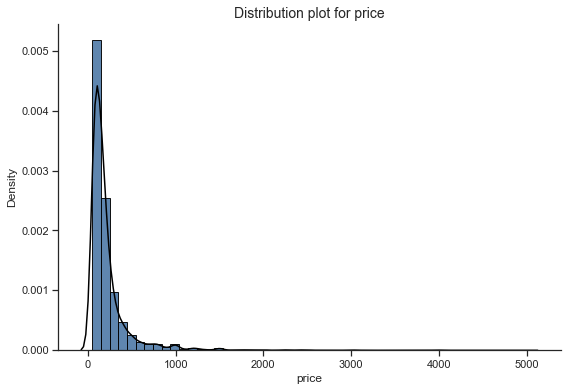

In [44]:
from statlearning import plot_dist
fig, ax = plot_dist(train_eda['price'])
ax.set_title('Distribution plot for price', fontsize=14)
plt.savefig('Distribution plot for price.png')
plt.show()

#### 2.2.1.2 Predictors

##### Descriptive statistics

In [45]:
descriptive = train_num.describe()
descriptive.loc['skew'] = train_num.skew()
descriptive.loc['kurtosis'] = train_num.kurt()
descriptive[continuous].round(3)

host_since  host_response_rate  host_acceptance_rate  \
count      10635.000           10635.000             10635.000   
mean        1832.640              55.066                56.007   
std          775.806              48.665                45.113   
min          322.000               0.000                 0.000   
25%         1254.000               0.000                 0.000   
50%         1860.000              97.000                80.000   
75%         2400.500             100.000               100.000   
max         4266.000             100.000               100.000   
skew           0.027              -0.220                -0.317   
kurtosis      -0.554              -1.920                -1.762   

          host_listings_count   latitude  longitude  security_deposit_perc  \
count               10635.000  10635.000  10635.000              10635.000   
mean                    9.384    -33.863    151.204                216.140   
std                    29.820      0.073      0.084                304.760   
min                     0.000    -34.093    150.654                  0.000   
25%                     1.000    -33.897    151.181                100.000   
50%                     1.000    -33.881    151.214                216.140   
75%                     3.000    -33.832    151.261                216.140   
max                   381.000    -33.400    151.340               9250.000   
skew                    5.464      1.146     -2.154                 12.541   
kurtosis               34.409      3.171      7.488                273.180   

          cleaning_fee_perc  extra_people_perc  minimum_nights  ...  \
count             10635.000          10635.000       10635.000  ...   
mean                 39.554              8.939           4.881  ...   
std                  38.367             21.453          16.620  ...   
min                   0.000              0.000           1.000  ...   
25%                   0.000              0.000           1.000  ...   
50%                  34.000              0.000           2.000  ...   
75%                  60.000             12.000           5.000  ...   
max                 344.000            525.000        1000.000  ...   
skew                  1.355              8.483          29.092  ...   
kurtosis              3.330            128.840        1389.459  ...   

          availability_30  availability_365  number_of_reviews  \
count           10635.000         10635.000          10635.000   
mean                7.061            93.840             17.369   
std                10.124           124.108             39.821   
min                 0.000             0.000              0.000   
25%                 0.000             0.000              1.000   
50%                 0.000            19.000              3.000   
75%                13.000           165.000             14.000   
max                30.000           365.000            646.000   
skew                1.150             1.092              4.953   
kurtosis           -0.174            -0.286             37.070   

          number_of_reviews_ltm  review_scores_rating  review_scores_checkin  \
count                 10635.000             10635.000              10635.000   
mean                      6.790                93.485                  9.730   
std                      14.096                 8.444                  0.667   
min                       0.000                20.000                  2.000   
25%                       0.000                93.485                  9.730   
50%                       1.000                93.485                 10.000   
75%                       6.000               100.000                 10.000   
max                     143.000               100.000                 10.025   
skew                      3.219                -3.940                 -5.975   
kurtosis                 12.867                24.095                 51.373   

          calculated_host_listings

##### Distribution plot for continous predictors

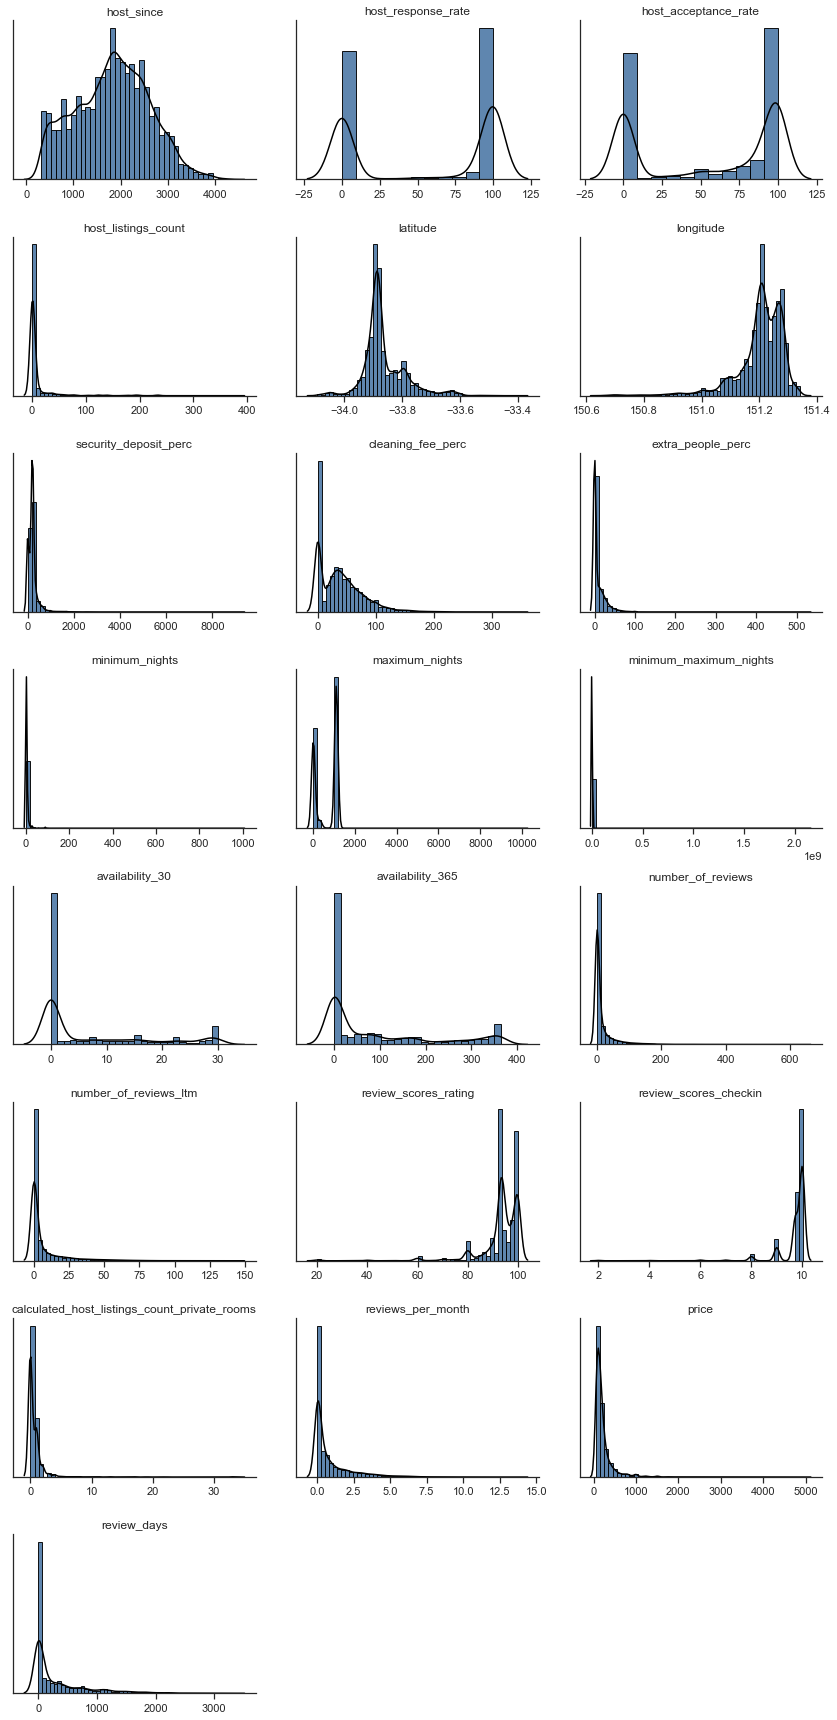

In [46]:
from statlearning import plot_dists
plot_dists(train_num[continuous])
plt.savefig('Distributions for continous variables.png')
plt.show()

### 2.2.2 Bivariate Analysis

##### 2.2.2.1 Correlation with repsonse

In [47]:
train_eda.corr()['price'].sort_values(ascending = False).round(3) 

price                                           1.000
bedrooms                                        0.606
accommodates                                    0.580
bathrooms                                       0.540
beds                                            0.529
guests_included                                 0.211
latitude                                        0.204
host_listings_count                             0.198
longitude                                       0.185
availability_365                                0.105
availability_30                                 0.091
host_since                                      0.052
review_scores_location                          0.051
review_scores_rating                            0.050
host_response_rate                              0.041
review_scores_checkin                           0.037
review_scores_communication                     0.029
review_scores_accuracy                          0.023
review_scores_cleanliness   

In [48]:
train_eda.to_excel('Correlation with response.xlsx')

##### 2.2.2.2 Regression Plot between Repsonse and Continous Predictors

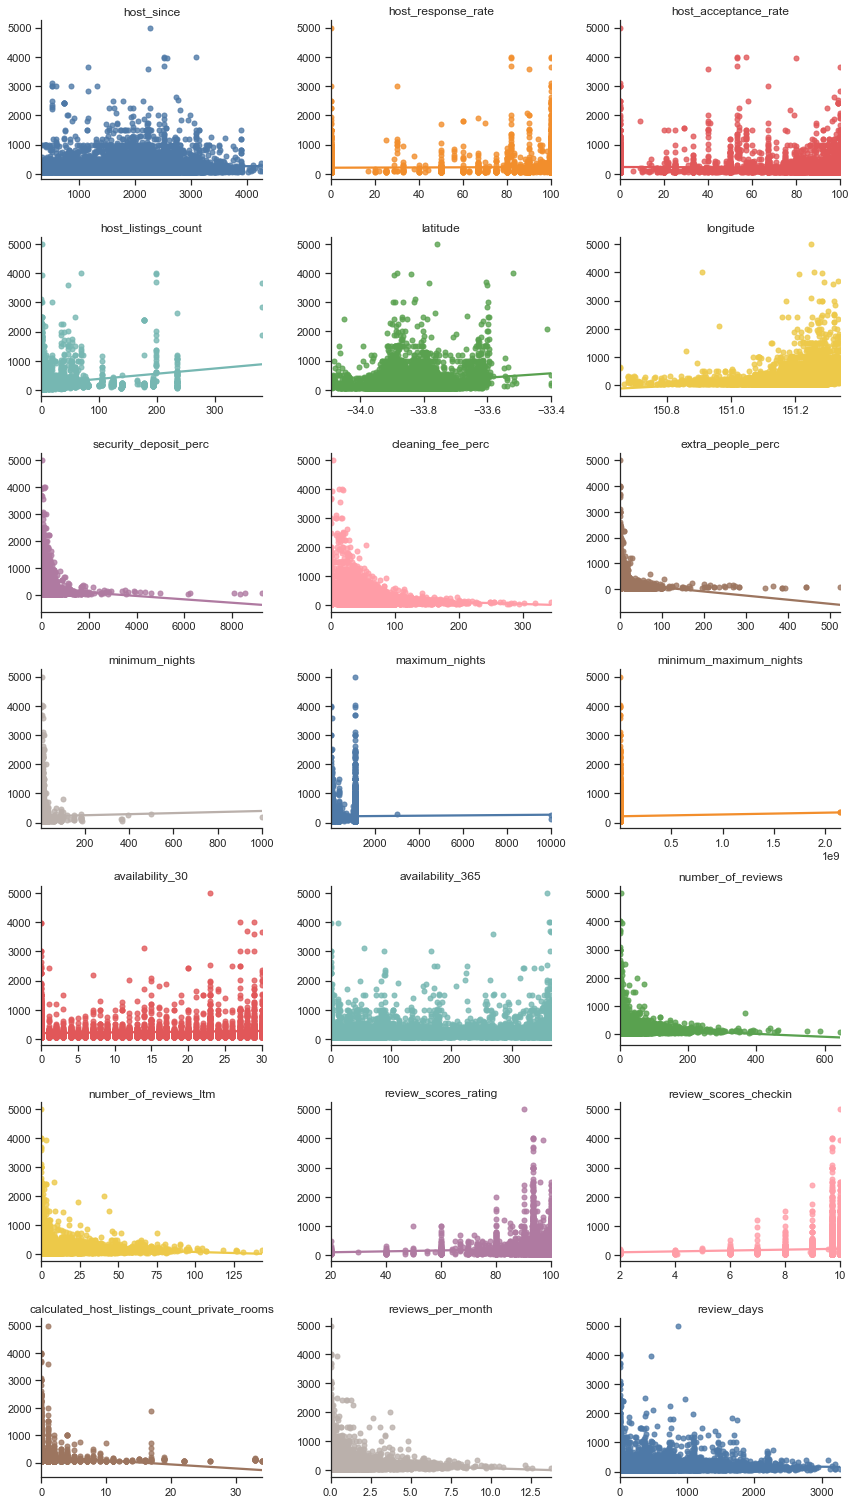

In [49]:
#check the collinearity
from statlearning import plot_regressions
continuous_reg = continuous.copy()
continuous_reg.remove('price')
plot_regressions(train_eda[continuous_reg],train_eda['price'])
plt.savefig('Collinarity for continuous variables')
plt.show()

##### 2.2.2.3 Regression Plot between Repsonse and Discrete Predictors

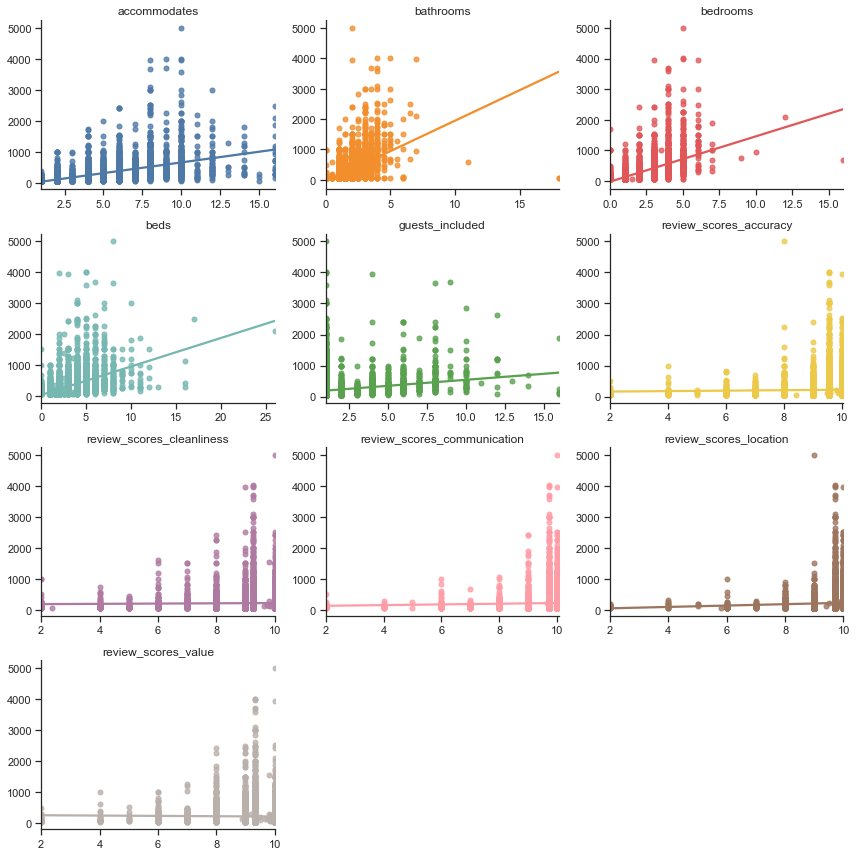

In [50]:
from statlearning import plot_regressions
discrete_reg = discrete.copy()
plot_regressions(train_num[discrete_reg],train_num['price'])
plt.savefig('Collinarity for discrete variables')
plt.show()

### 2.2.3 Multivariate Analysis

In [51]:
corr_train = train_eda.corr()['price'].sort_values()
train_eda_corr = train_eda[corr_train.loc[(corr_train>0.05)|(corr_train<-0.05)].index]

In [52]:
train_eda_corr.corr()

extra_people_perc  \
extra_people_perc                                      1.000000   
calculated_host_listings_count_private_rooms           0.052179   
cleaning_fee_perc                                      0.114881   
reviews_per_month                                      0.063775   
number_of_reviews                                      0.069129   
number_of_reviews_ltm                                  0.063731   
security_deposit_perc                                  0.080439   
space                                                 -0.082404   
review_scores_location                                -0.011685   
host_since                                             0.027351   
availability_30                                        0.066589   
availability_365                                       0.062990   
longitude                                             -0.087495   
host_listings_count                                   -0.048318   
latitude                                              -0.026098   
guests_included                                        0.117806   
beds                                                  -0.076533   
bathrooms                                             -0.070020   
accommodates                                          -0.087221   
bedrooms                                              -0.099691   
price                                                 -0.126792   

                                              calculated_host_listings_count_private_rooms  \
extra_people_perc                                                                 0.052179   
calculated_host_listings_count_private_rooms                                      1.000000   
cleaning_fee_perc                                                                -0.055048   
reviews_per_month                                                                -0.006605   
number_of_reviews                                                                -0.028487   
number_of_reviews_ltm                                                            -0.023095   
security_deposit_perc                                                            -0.021278   
space                                                                             0.000076   
review_scores_location                                                           -0.057745   
host_since                                                                       -0.089620   
availability_30                                                                   0.100655   
availability_365                                                                  0.060094   
longitude                                                                        -0.089444   
host_listings_count                                                               0.026250   
latitude                                                                         -0.041088   
guests_included                                                                  -0.071252   
beds                                                                             -0.124392   
bathrooms                                                                        -0.001054   
accommodates                                                                     -0.159387   
bedrooms                                                                         -0.137267   
price                                                                            -0.117357   

                                              cleaning_fee_perc  \
extra_people_perc                                      0.114881   
calculated_host_listings_count_private_rooms          -0.055048   
cleaning_fee_perc                                      1.000000   
reviews_per_month                                      0.129575   
number_of_reviews                                      0.058823   
number_of_reviews_ltm                                  0.109406   
security_deposit_perc            

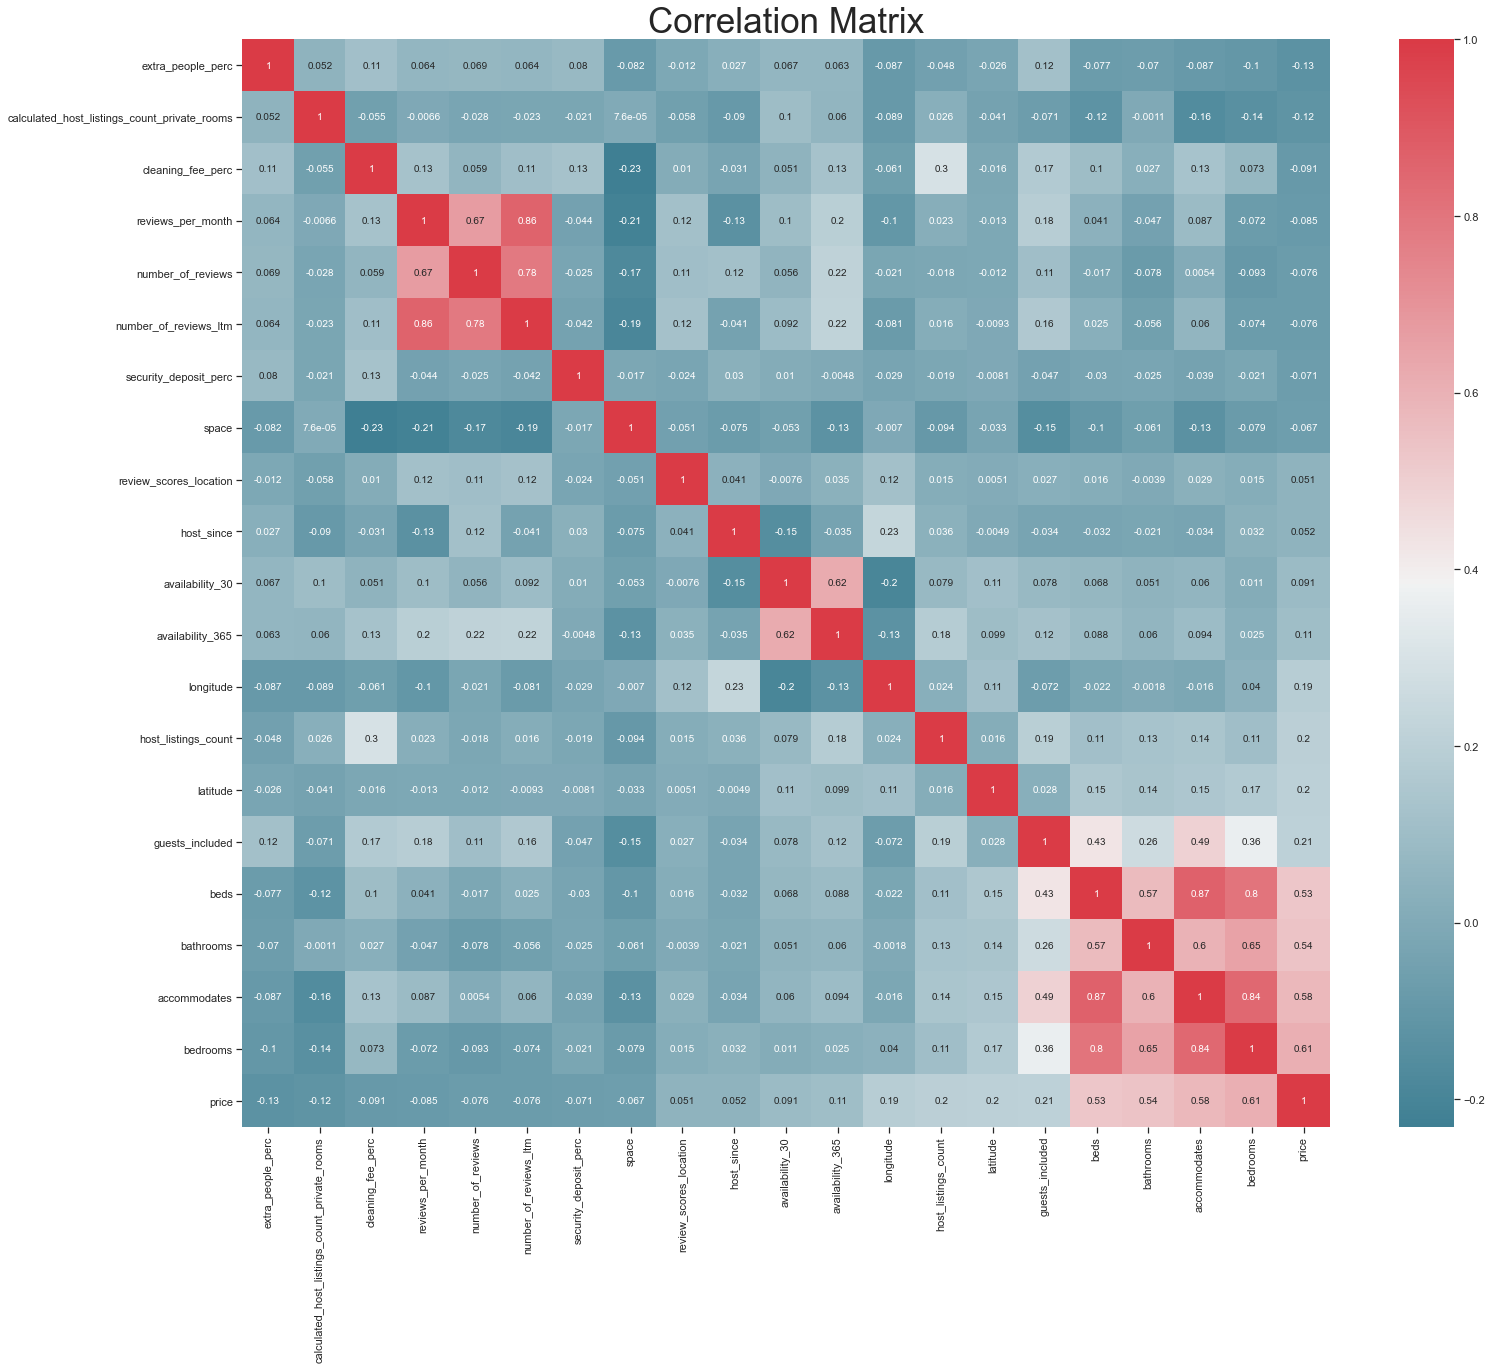

In [53]:
plt.subplots(figsize = (25,20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(train_eda_corr.corr(), square = True, annot = True, cmap = cmap)
sns.set(font_scale = 2.0)
plt.rc('font',size=20)
plt.title('Correlation Matrix',fontsize=35)

plt.savefig('correlation matrix.png')
plt.show()

### 2.2.4 Map

In [54]:
train_map = train_eda[['neighbourhood_cleansed','latitude','longitude','price']]
train_map.head()

neighbourhood_cleansed  latitude  longitude  price
0       Sutherland Shire -34.02896  151.10229   74.0
1               Randwick -33.91539  151.23659   63.0
2           Marrickville -33.88847  151.16651  176.0
3                  Manly -33.80042  151.27293  195.0
4              Warringah -33.75705  151.29361   51.0

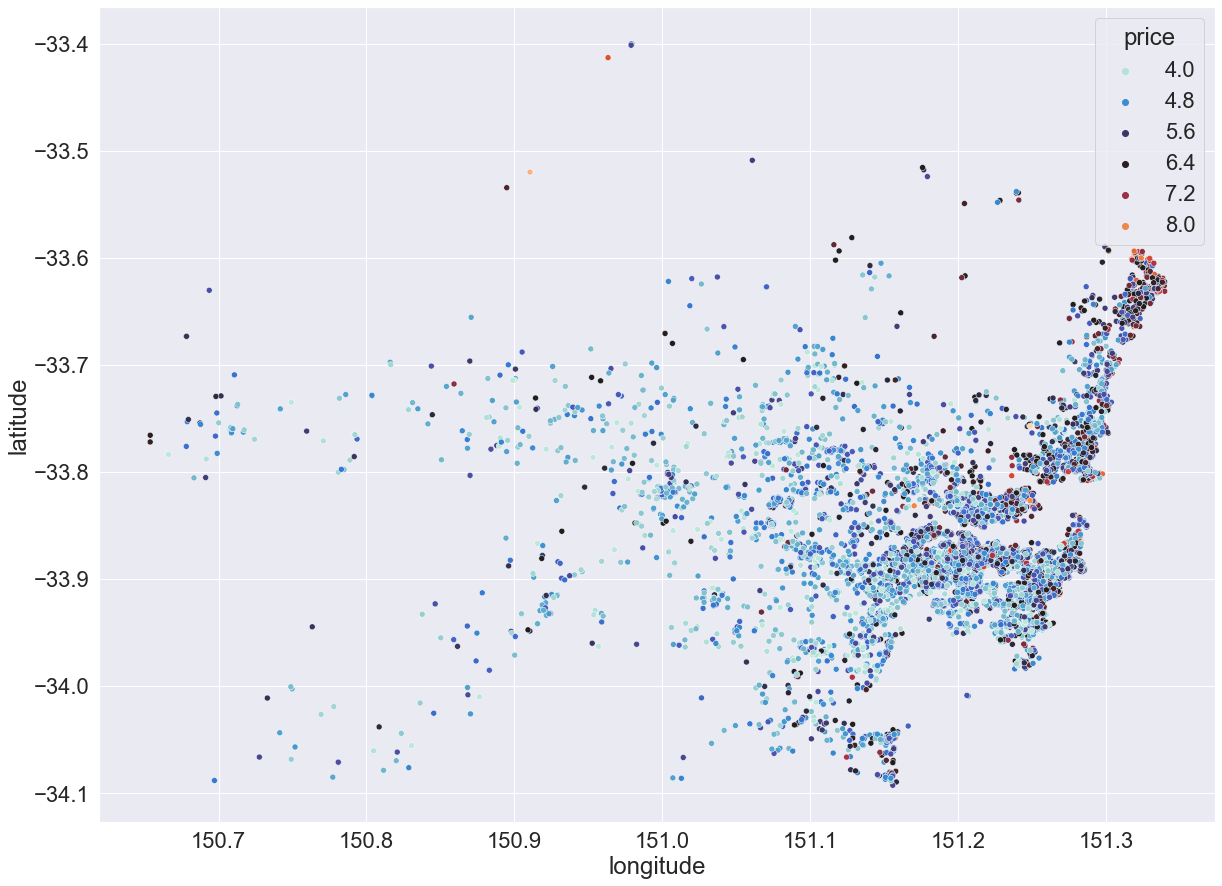

In [55]:
plt.figure(figsize = (20,15))
cmap = sns.color_palette("icefire",as_cmap=True)
sns.scatterplot(x = train_map['longitude'],y = train_map['latitude'],hue = np.log(train_map['price']),palette = cmap )
plt.savefig('map.png')
plt.show()

## 2.3 Nominal Variable

### 2.3.1 Categorical variables

In [56]:
cate_predictors =['host_response_time','cancellation_policy','host_is_superhost',
                  'instant_bookable','host_identity_verified','is_location_exact','room_type',
                  'property_type']

#### 2.3.1.1 Distribution plot

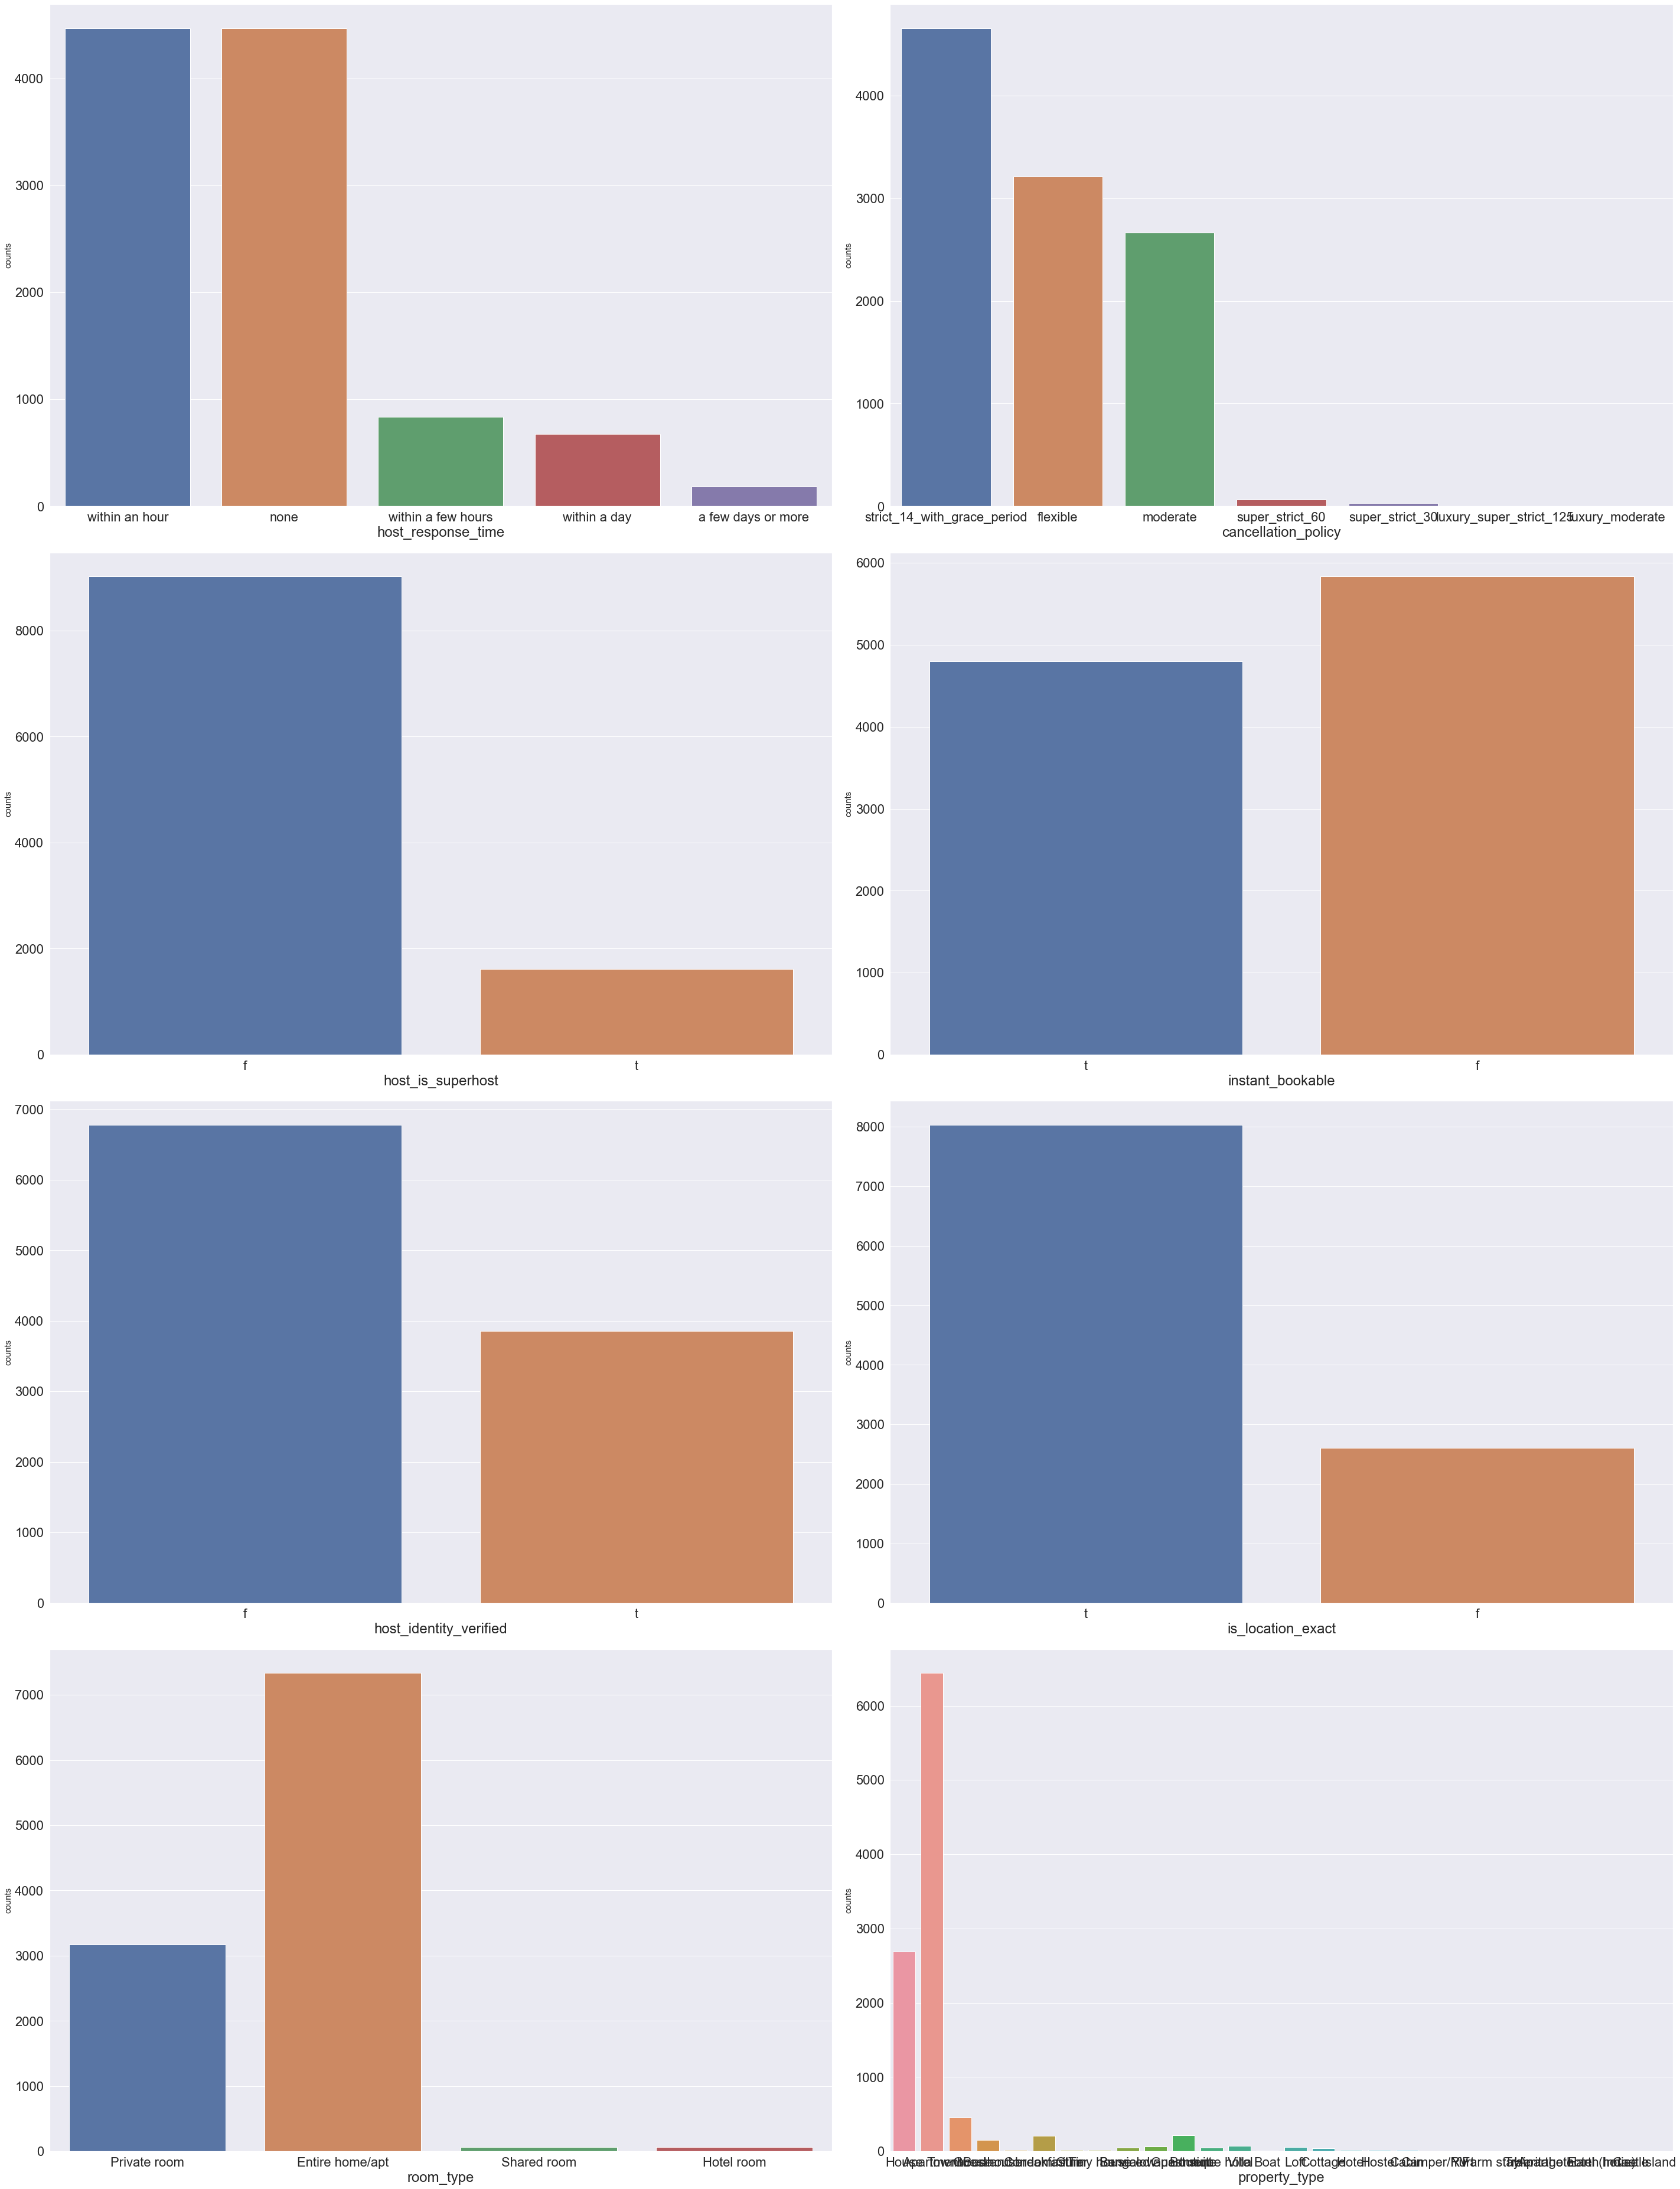

In [57]:
plt.figure(figsize = (40,len(cate_predictors)*8))
for i, r in enumerate(cate_predictors):
    x = train_eda[r]
    plt.subplot(5,2,i+1)
    plt.subplots_adjust(hspace = 0.3)
    sns.countplot(x)
    plt.ylabel('counts',fontsize =15)
plt.savefig('distribution of categorical feature.png')
plt.tight_layout()

#### 2.3.2 Multivariate Analysis

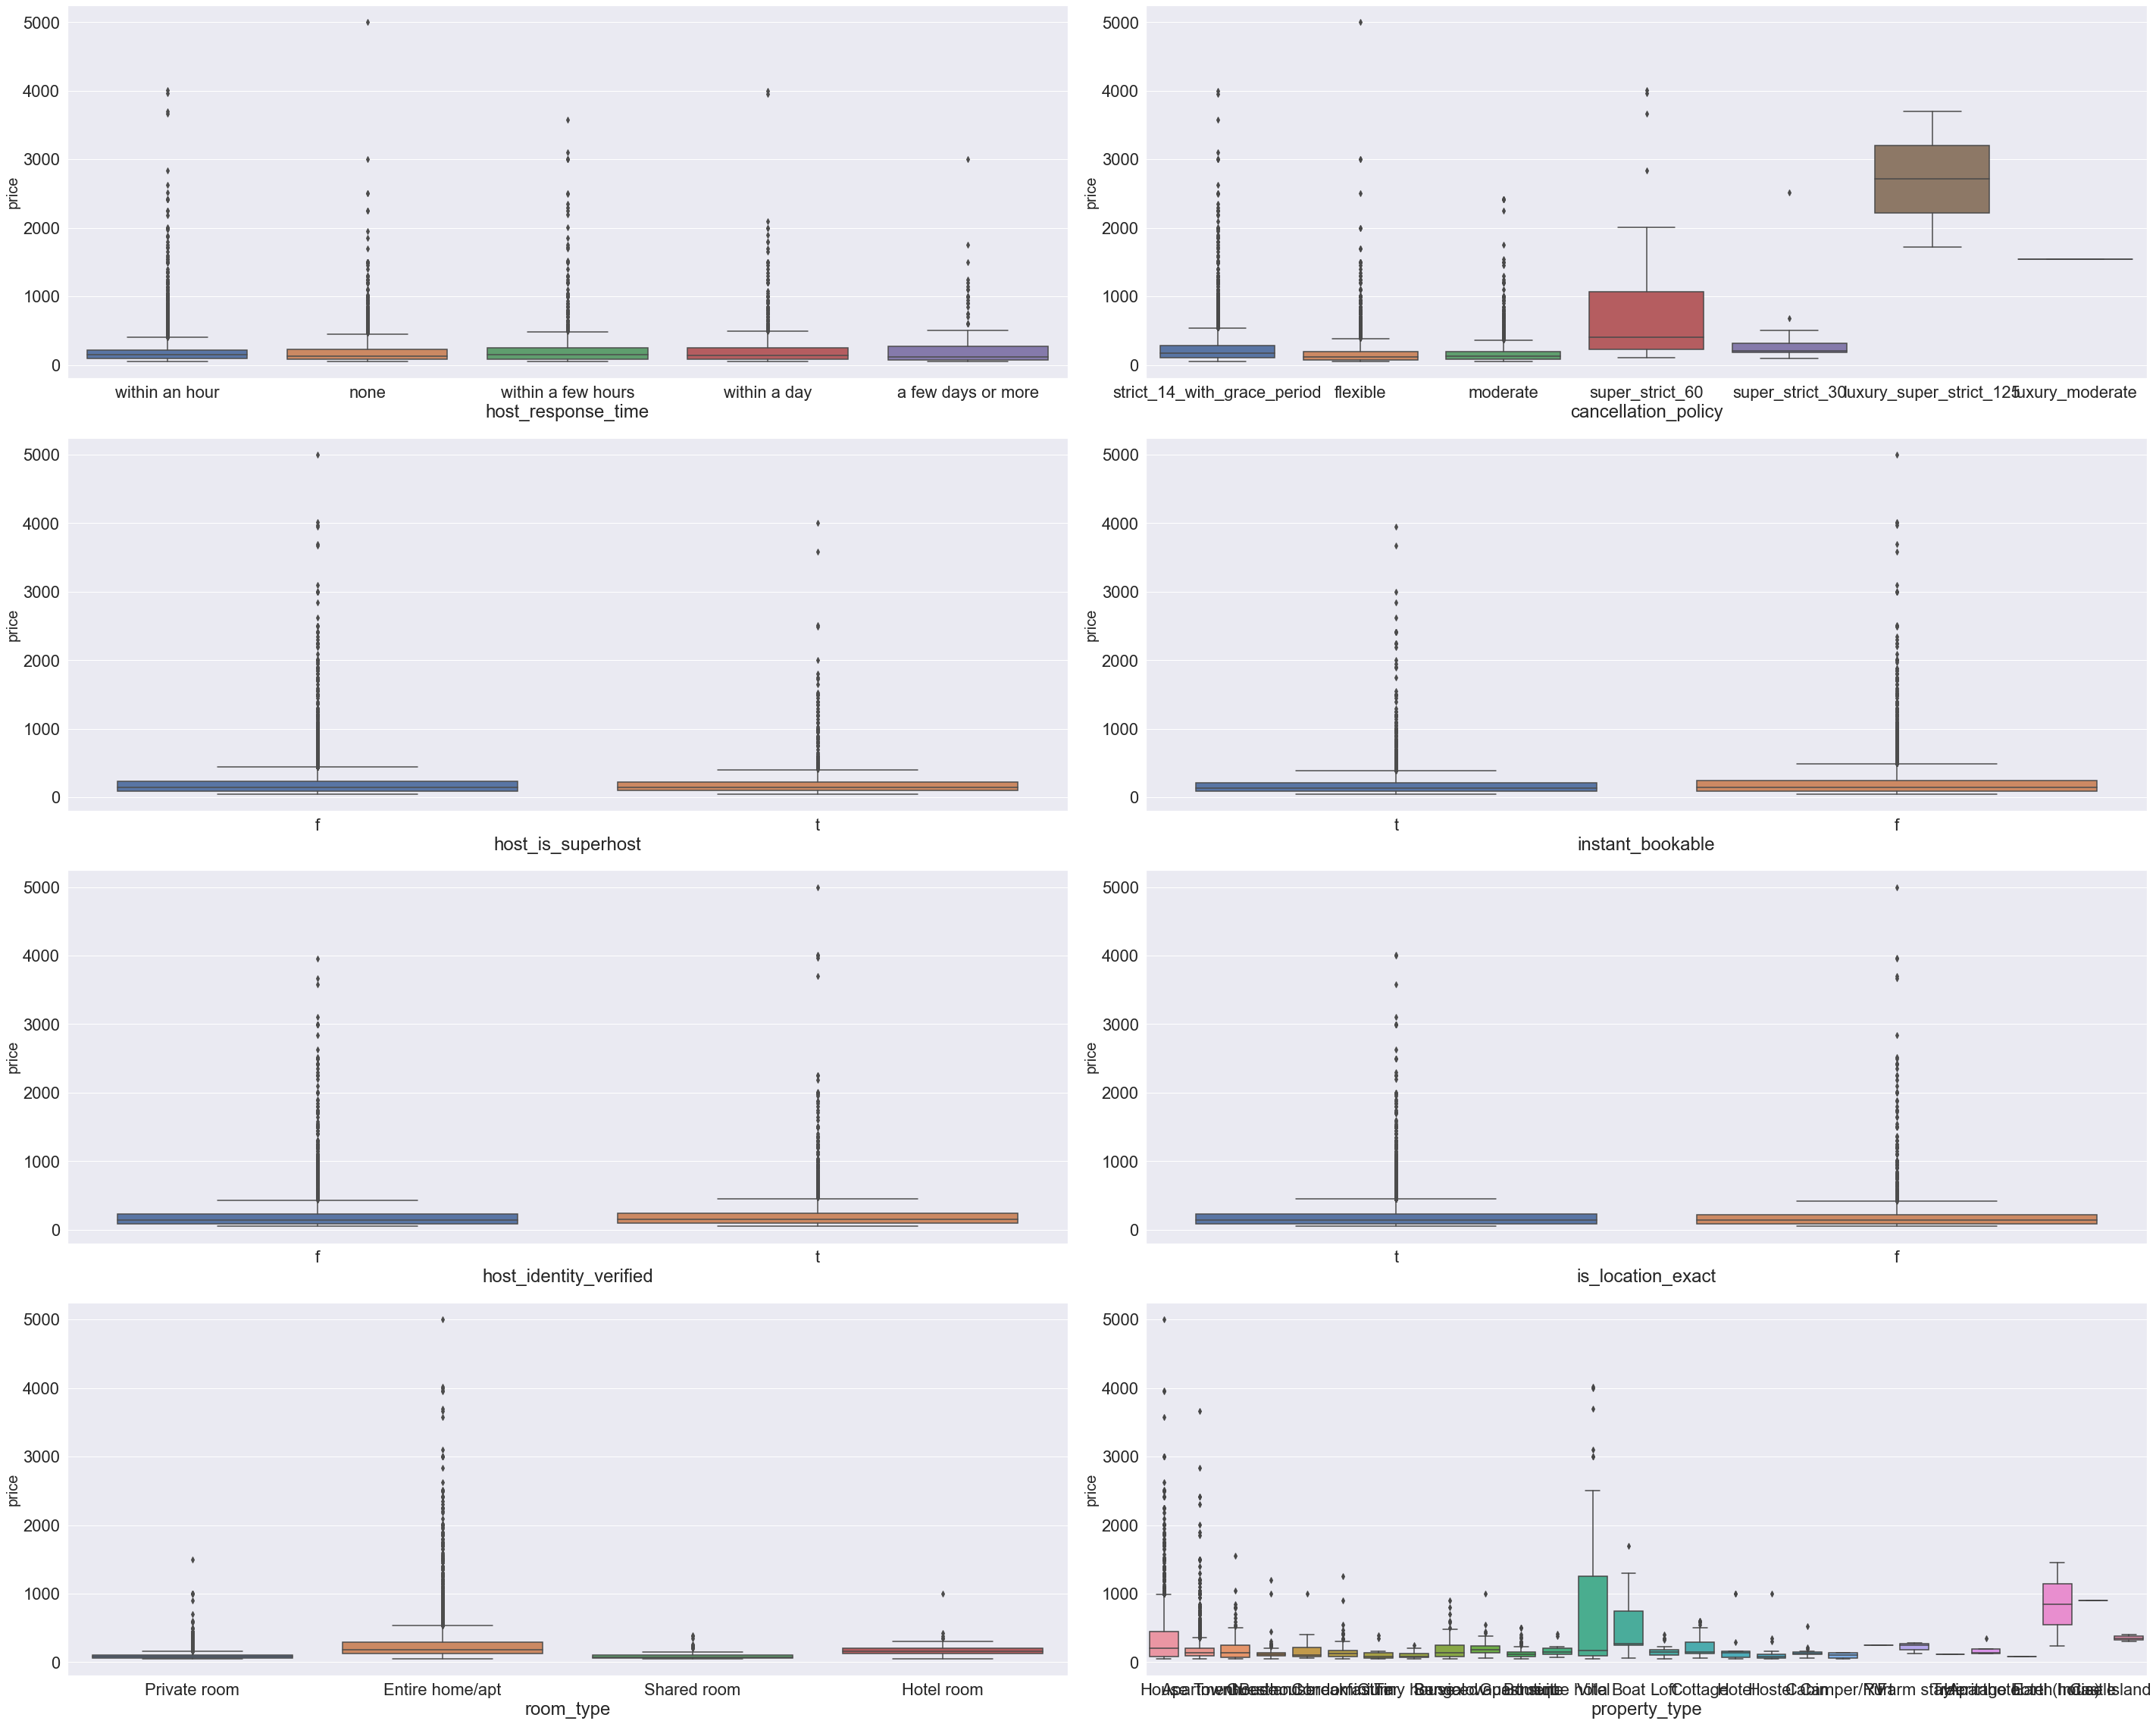

In [58]:
plt.figure(figsize = (40,len(cate_predictors)*4))
for i, value in enumerate(cate_predictors):
    a = train_eda[value]
    b = train_eda['price']
    plt.subplot(4,2,i+1)
    plt.subplots_adjust(hspace = 0.3)
    sns.boxplot(x= a, y = b,orient ='v')
    plt.ylabel('price',fontsize = 20)

plt.savefig('relationship of categorical feature and the house price.png')
plt.tight_layout()

### 2.3.2 Textual variables

In [59]:
text_predictors = ['name','description','neighborhood_overview']

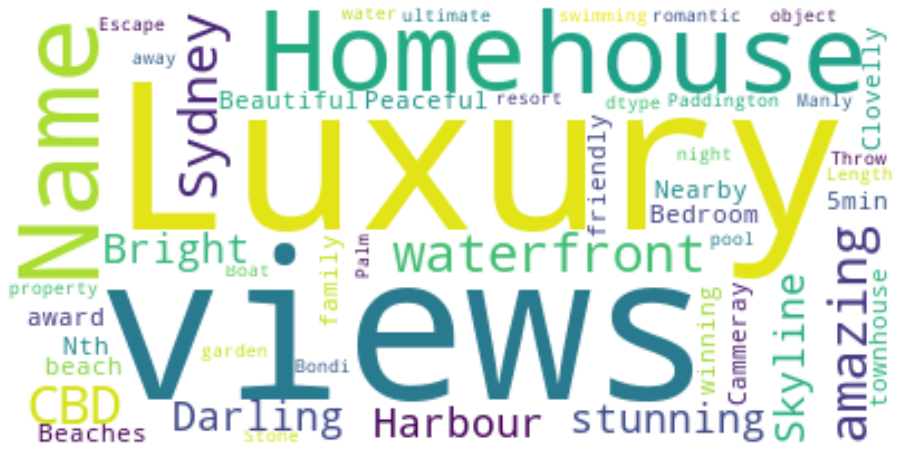

In [60]:
from wordcloud import WordCloud
good_names = train_eda[train_eda['price']>=train_eda['price'].quantile(0.75)]['name']

fig, ax = plt.subplots()
wordcloud=WordCloud(background_color='white',collocations=False,max_words=30000).generate(str(good_names))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('good names.png')
plt.show()

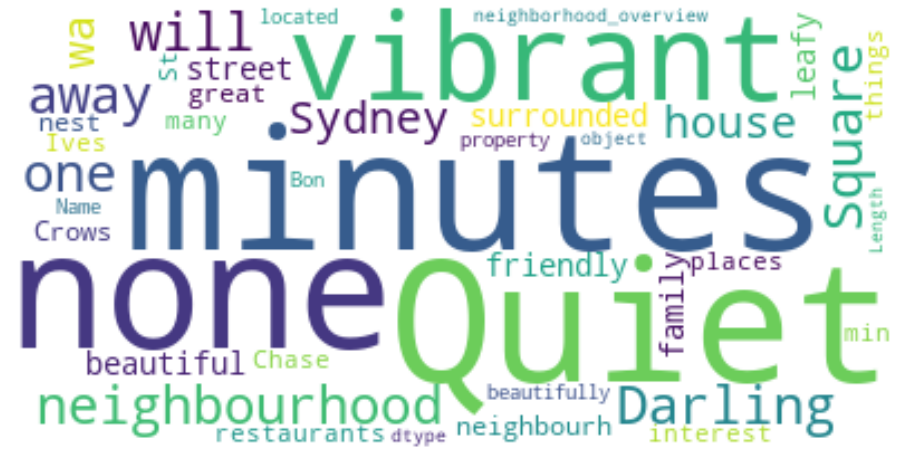

In [61]:
good_neighborhood_overviews = train_eda[train_eda['price']>=train_eda['price'].quantile(0.75)]['neighborhood_overview']

fig, ax = plt.subplots()
wordcloud=WordCloud(background_color='white',collocations=False,max_words=30000).generate(str(good_neighborhood_overviews))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('good neighborhood overviews.png')
plt.show()

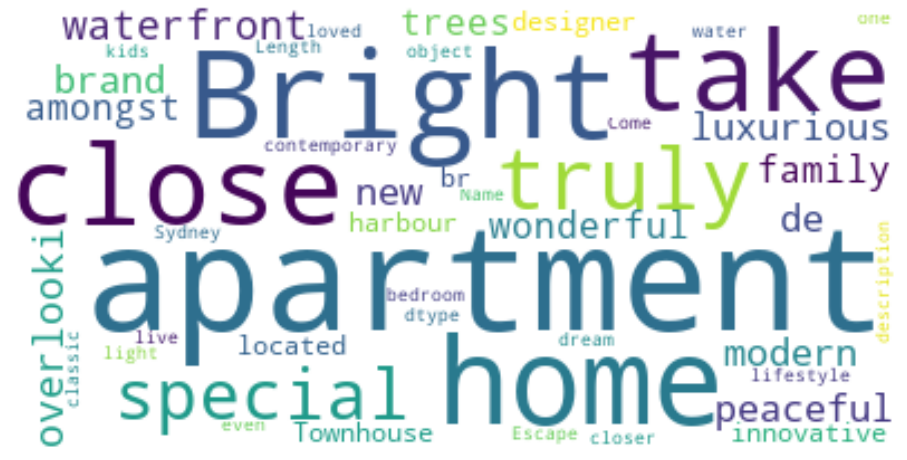

In [62]:
good_descriptions = train_eda[train_eda['price']>=train_eda['price'].quantile(0.75)]['description']

fig, ax = plt.subplots()
wordcloud=WordCloud(background_color='white',collocations=False,max_words=30000).generate(str(good_descriptions))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('good descriptions.png')
plt.show()

# 3. Feature Egineering

In [63]:
train_FE = train_filled.copy()
test_FE = test_filled.copy()

print(train_FE. columns)

Index(['name', 'space', 'description', 'neighborhood_overview', 'notes',
       'transit', 'access', 'interaction', 'house_rules', 'host_since',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_listings_count', 'host_verifications', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'amenities', 'security_deposit_perc', 'cleaning_fee_perc',
       'guests_included', 'extra_people_perc', 'minimum_nights',
       'maximum_nights', 'minimum_maximum_nights', 'availability_30',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_sc

## 3.1 Transforming the response variable 

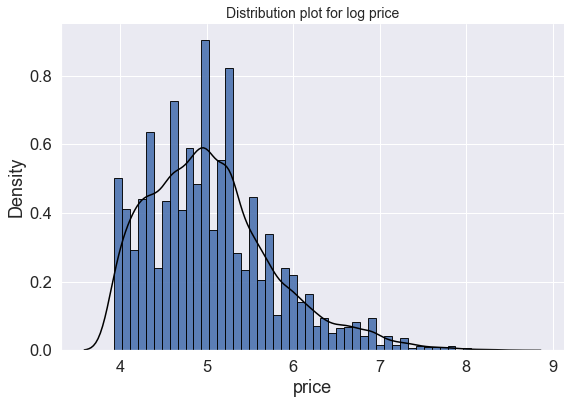

In [64]:
sns.set(font_scale=1.5)
train_FE['price'] = np.log(train_FE['price'])
fig, ax = plot_dist(train_FE['price'])
ax.set_title('Distribution plot for log price', fontsize=14)

plt.show()

## 3.2 Extract useful information to create new variable

In [65]:
#number of verification types
train_FE['host_verifications'] = train_FE['host_verifications'].apply(lambda x: len(x.split(',')))

In [66]:
#number of amenities
train_FE['amenities'] = train_FE['amenities'].apply(lambda x: len(x.split(',')))

In [67]:
#number of good words in description
import re

count_niceword_train = []
for i in train_FE['description']: 
    count_result_train = re.findall(r'(bright|new|good|great|nice|luxurious|wondeful|special|peaceful|loved|home|modern|designer|dream|close|near)', i)
    count_num_train = len(count_result_train) 
    count_niceword_train.append(count_num_train)
train_FE['description'] = count_niceword_train


In [68]:
train_FE['transit']=train_FE['transit'].apply(lambda x: len(x.split())).values

In [69]:
test_FE['host_verifications'] = test_FE['host_verifications'].apply(lambda x: len(x.split(',')))

In [70]:
test_FE['amenities'] = test_FE['amenities'].apply(lambda x: len(x.split(',')))

In [71]:
count_niceword_test = []
for i in test_FE['description']: 
    count_result_test = re.findall(r'(bright|new|good|great|nice|luxurious|wondeful|special|peaceful|loved|home|modern|designer|dream|close|near)', i)
    count_num_test = len(count_result_test)
    count_niceword_test.append(count_num_test)
test_FE['description'] = count_niceword_test

In [72]:
test_FE['transit']=test_FE['transit'].apply(lambda x: len(x.split())).values

In [73]:
#Drop name and neighborhood_overview in textual predictors
train_FE = train_FE.drop(['name','neighborhood_overview'],axis =1)
test_FE = test_FE.drop(['name','neighborhood_overview'],axis =1)

## 3.3 Data Encoding

### 3.3.1 Ordinal Encoding

#### 3.3.1.1 Cancellation Policy

In [74]:
print(train_FE['cancellation_policy'].value_counts())

strict_14_with_grace_period    4657
flexible                       3213
moderate                       2667
super_strict_60                  66
super_strict_30                  29
luxury_super_strict_125           2
luxury_moderate                   1
Name: cancellation_policy, dtype: int64


In [75]:
test_FE['cancellation_policy'].value_counts()

strict_14_with_grace_period    10887
flexible                        7645
moderate                        6077
super_strict_60                  130
super_strict_30                   72
luxury_moderate                    3
luxury_no_refund                   2
strict                             1
luxury_super_strict_125            1
Name: cancellation_policy, dtype: int64

In [76]:
train_FE. loc[(train_FE['cancellation_policy']=='strict_14_with_grace_period')
              |(train_FE['cancellation_policy']=='super_strict_60')
              |(train_FE['cancellation_policy']=='super_strict_30')
              |(train_FE['cancellation_policy']=='luxury_super_strict_125')
              |(train_FE['cancellation_policy']=='luxury_no_refund')
              |(train_FE['cancellation_policy']=='strict')
              ,'cancellation_policy'] = 'strict'

In [77]:
train_FE. loc[(train_FE['cancellation_policy']=='moderate')
              |(train_FE['cancellation_policy']=='luxury_moderate')
              ,'cancellation_policy'] = 'moderate'

In [78]:
test_FE. loc[(test_FE['cancellation_policy']=='strict_14_with_grace_period')
              |(test_FE['cancellation_policy']=='super_strict_60')
              |(test_FE['cancellation_policy']=='super_strict_30')
              |(test_FE['cancellation_policy']=='luxury_super_strict_125')
              |(test_FE['cancellation_policy']=='luxury_no_refund')
              |(test_FE['cancellation_policy']=='strict')
              ,'cancellation_policy'] = 'strict'

In [79]:
test_FE. loc[(test_FE['cancellation_policy']=='moderate')
              |(test_FE['cancellation_policy']=='luxury_moderate')
              ,'cancellation_policy'] = 'moderate'

In [80]:
print(train_FE['cancellation_policy'].value_counts())

strict      4754
flexible    3213
moderate    2668
Name: cancellation_policy, dtype: int64


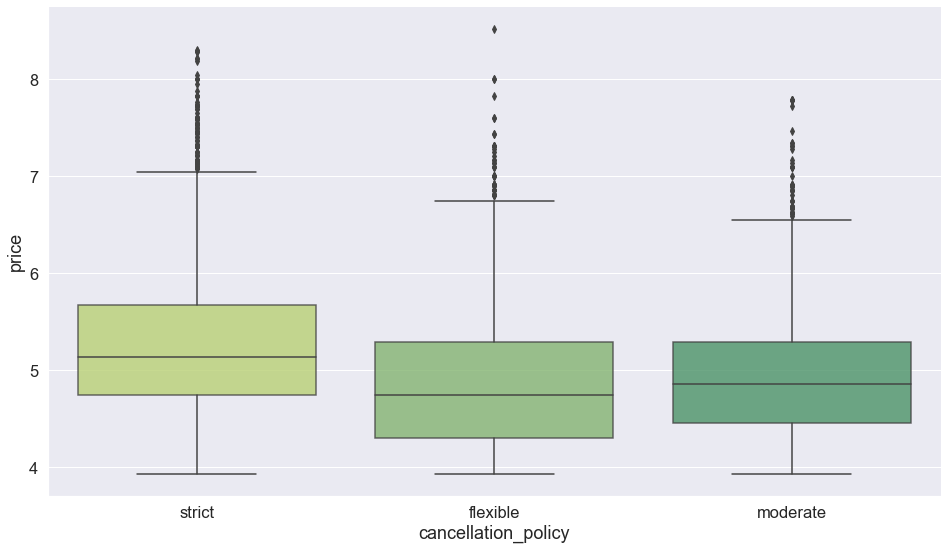

In [81]:
sns.boxplot(x = train_FE['cancellation_policy'], y = train_FE['price'],boxprops=dict(alpha=0.8),palette='summer_r')
sns.despine()
sns.set(font_scale=2)
plt.savefig('The distribution between cancellation policy and price.png')

plt.show()
#stricter policy, the higher the price

#### 3.3.1.2 Response Time

In [82]:
print(train_FE['host_response_time'].value_counts())

none                  4472
within an hour        4467
within a few hours     837
within a day           674
a few days or more     185
Name: host_response_time, dtype: int64


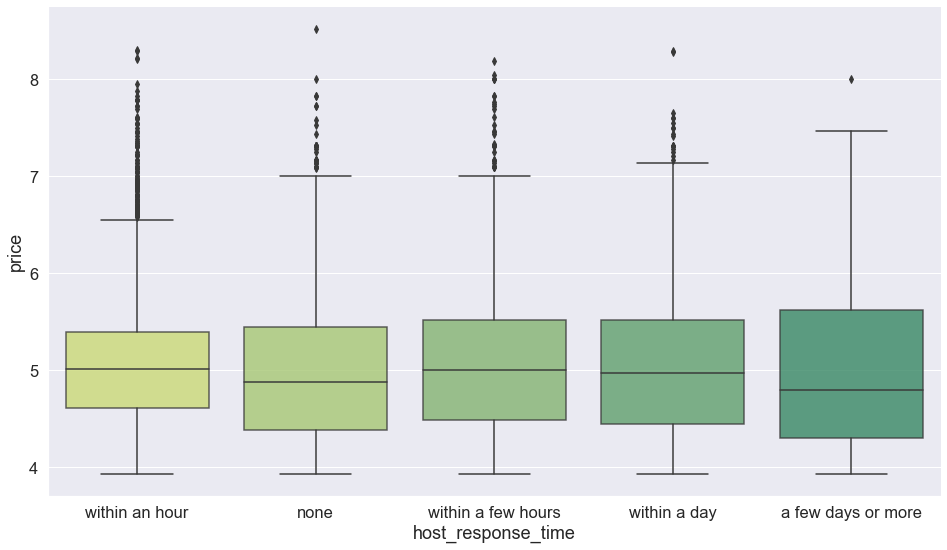

In [83]:
sns.set(font_scale=1.5)
sns.boxplot(x = train_FE['host_response_time'], y = train_FE['price'], boxprops=dict(alpha=0.8), palette='summer_r')
sns.despine()
plt.savefig('The distribution between response time and price.png')
plt.show()

#### 3.3.1.3 Room type

In [84]:
print(train_FE['room_type'].value_counts())

Entire home/apt    7334
Private room       3171
Shared room          65
Hotel room           65
Name: room_type, dtype: int64


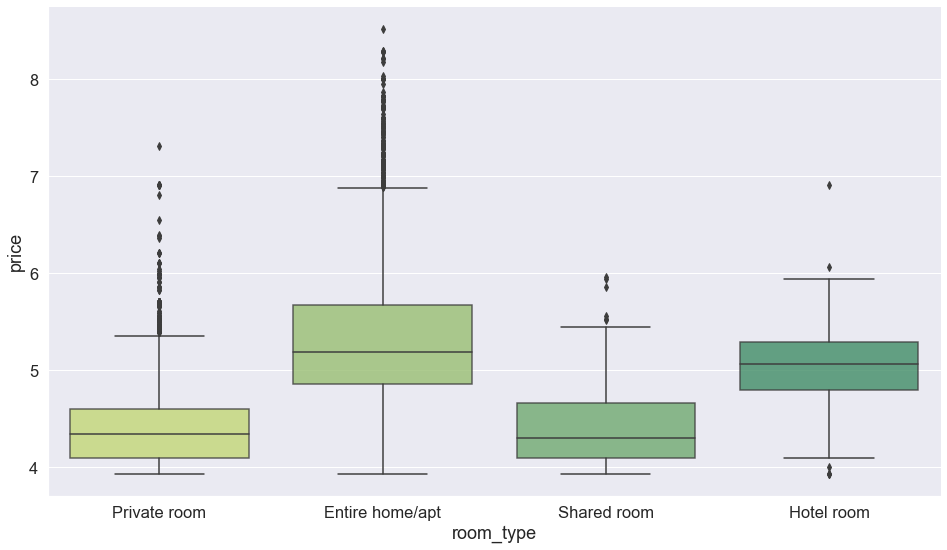

In [85]:
sns.set(font_scale=1.5)
sns.boxplot(x = train_FE['room_type'], y = train_FE['price'], boxprops=dict(alpha=0.8), palette='summer_r')
sns.despine()
plt.savefig('The distribution between room type and price.png')
plt.show()

#### 3.3.1.4 Encoding

In [86]:
train_FE['cancellation_policy'] = train_FE['cancellation_policy']. replace({
    'flexible': 1, 
    'moderate': 2,
    'strict': 3, })

In [87]:
test_FE['cancellation_policy'] = test_FE['cancellation_policy']. replace({
    'flexible': 1, 
    'moderate': 2,
    'strict': 3, })

In [88]:
train_FE['host_response_time'] = train_FE['host_response_time']. replace({
    'none': 1, 
    'a few days or more': 2,
    'within a day': 3, 
    'within a few hours': 4, 
    'within an hour': 5,})

In [89]:
test_FE['host_response_time'] = test_FE['host_response_time']. replace({
    'none': 1, 
    'a few days or more': 2,
    'within a day': 3, 
    'within a few hours': 4, 
    'within an hour': 5,})

In [90]:
train_FE['room_type'] = train_FE['room_type']. replace({
    'Shared room': 1, 
    'Private room': 2,
    'Hotel room': 3, 
    'Entire home/apt': 4})

In [91]:
test_FE['room_type'] = test_FE['room_type']. replace({
    'Shared room': 1, 
    'Private room': 2,
    'Hotel room': 3, 
    'Entire home/apt': 4})

### 3.3.2 Nominal Encoding

#### 3.3.2.1 Proporty Type

In [92]:
#merge sparse labels
train_FE['property_type']. value_counts()

Apartment                 6439
House                     2692
Townhouse                  451
Guest suite                216
Condominium                208
Guesthouse                 155
Villa                       75
Serviced apartment          63
Loft                        58
Bungalow                    51
Boutique hotel              48
Cottage                     42
Hostel                      21
Tiny house                  20
Cabin                       19
Bed and breakfast           19
Hotel                       14
Other                       14
Boat                        11
Aparthotel                   4
Camper/RV                    4
Farm stay                    3
Island                       2
Earth house                  2
Train                        1
Heritage hotel (India)       1
Castle                       1
Yurt                         1
Name: property_type, dtype: int64

In [93]:
property_typename = train_FE['property_type']. value_counts(). index[:6]
train_FE['property_type'] = train_FE['property_type']. apply(lambda x: 'Other' if x not in property_typename else x)

In [94]:
test_FE['property_type'] = test_FE['property_type']. apply(lambda x: 'Other' if x not in property_typename else x)

In [95]:
train_FE['property_type']. value_counts()

Apartment      6439
House          2692
Other           474
Townhouse       451
Guest suite     216
Condominium     208
Guesthouse      155
Name: property_type, dtype: int64

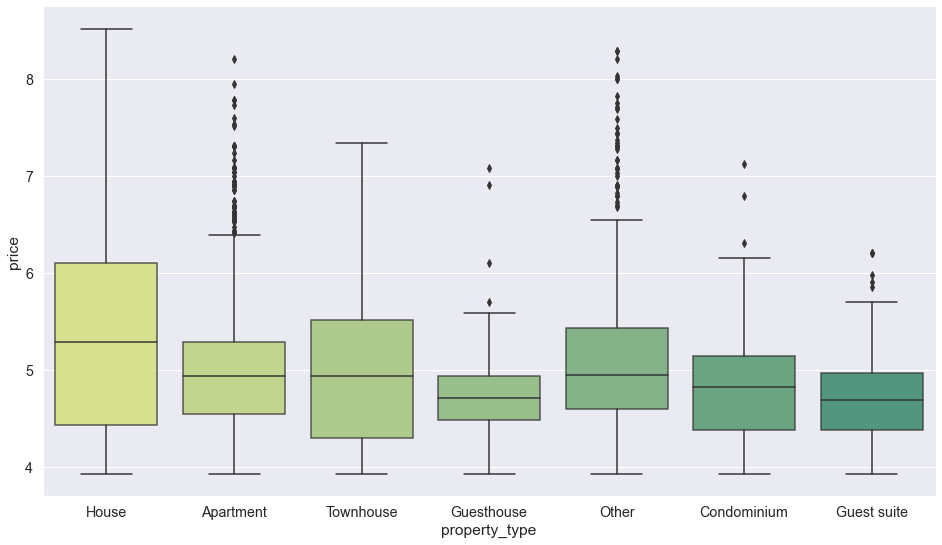

In [96]:
sns.set(font_scale=1.3)
sns.boxplot(x = train_FE['property_type'], y = train_FE['price'], boxprops=dict(alpha=0.8), palette='summer_r')
sns.despine()
plt.savefig('The distribution between property type and price.png')
plt.show()

#### 3.3.2.2 Neighbourhood Cleansed

In [97]:
#high cardinality
train_FE['neighbourhood_cleansed']. value_counts()

Sydney              2861
Waverley            1515
Randwick             886
Warringah            548
Manly                494
Woollahra            468
North Sydney         395
Pittwater            360
Marrickville         324
Leichhardt           293
Rockdale             237
Ryde                 188
Botany Bay           184
Sutherland Shire     180
Willoughby           150
Mosman               141
Parramatta           134
Auburn               132
Hornsby              130
Canada Bay           124
Lane Cove             89
Blacktown             79
Burwood               72
Ku-Ring-Gai           70
The Hills Shire       67
Ashfield              66
Canterbury            61
Bankstown             55
Strathfield           54
City Of Kogarah       52
Hurstville            49
Liverpool             44
Penrith               43
Holroyd               21
Campbelltown          21
Fairfield             21
Hunters Hill          17
Camden                10
Name: neighbourhood_cleansed, dtype: int64

In [98]:
from category_encoders.glmm import GLMMEncoder

X_n = train_FE['neighbourhood_cleansed']
Y_n = train_FE['price']

glmm=GLMMEncoder().fit(X_n,Y_n)
train_FE['neighbourhood_c']=glmm.transform(train_FE['neighbourhood_cleansed'])
test_FE['neighbourhood_c']=glmm.transform(test_FE['neighbourhood_cleansed'])

In [99]:
train_FE['neighbourhood_c']

0        0.185791
1        0.051026
2       -0.181912
3        0.472328
4        0.348696
           ...   
10630    0.249237
10631    0.249237
10632    0.094685
10633    0.249237
10634   -0.276076
Name: neighbourhood_c, Length: 10635, dtype: float64

In [100]:
train_FE['neighbourhood_cleansed']

0        Sutherland Shire
1                Randwick
2            Marrickville
3                   Manly
4               Warringah
               ...       
10630            Waverley
10631            Waverley
10632              Sydney
10633            Waverley
10634          Canterbury
Name: neighbourhood_cleansed, Length: 10635, dtype: object

In [101]:
#Drop neighbourhood_cleansed
train_FE = train_FE.drop(['neighbourhood_cleansed'],axis =1)
test_FE = test_FE.drop(['neighbourhood_cleansed'],axis =1)

In [102]:
train_FE.shape

(10635, 52)

In [103]:
test_FE.shape

(24818, 51)

### 3.3.3 Transfer dummy variable for category variable

In [104]:
train_FE_dm = pd.get_dummies(train_FE, drop_first=True)

In [105]:
test_FE_dm = pd.get_dummies(test_FE, drop_first=True)

In [106]:
train_FE_dm

space  description  notes  transit  access  interaction  house_rules  \
0          0            2      0        9       0            0            1   
1          1            1      1       17       1            0            1   
2          0            1      0       21       0            0            0   
3          0            0      1       66       0            0            0   
4          0            2      1       49       0            1            0   
...      ...          ...    ...      ...     ...          ...          ...   
10630      0            3      1        1       0            0            0   
10631      1            0      1        1       1            1            1   
10632      0            2      0       21       0            0            0   
10633      0            5      0       44       1            0            0   
10634      1            1      1        1       1            1            0   

       host_since  host_about  host_response_time  ...  host_is_superhost_t  \
0            1853           0                   5  ...                    0   
1            1387           1                   1  ...                    0   
2            2033           0                   5  ...                    1   
3            1422           0                   1  ...                    0   
4            2186           0                   1  ...                    0   
...           ...         ...                 ...  ...                  ...   
10630        1480           1                   5  ...                    0   
10631        2605           1                   1  ...                    0   
10632        1945           1                   1  ...                    0   
10633        1711           1                   5  ...                    0   
10634        1862           1                   1  ...                    0   

       host_identity_verified_t  is_location_exact_t  \
0                             0                    1   
1                             0                    1   
2                             0                    1   
3                             0                    1   
4                             0                    1   
...                         ...                  ...   
10630                         0                    0   
10631                         1                    0   
10632                         1                    0   
10633                         1                    0   
10634                         1                    1   

       property_type_Condominium  property_type_Guest suite  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   
...                          ...                        ...   
10630                          0                          0   
10631                          0                          0   
10632                          0                          0   
10633                          0                          0   
10634                          0                          0   

       property_type_Guesthouse  property_type_House  property_type_Other  \
0                             0                    1                    0   
1                             0                    0                    0   
2                             0                    1                    0   
3                             0                    0                    0   
4                             0                    0                    0   
...                         ...                  ...                  ...   
10630                         0                    0                    0   
10631                         0                    0           

#### Check the difference between train and test set

In [107]:
test_diff=[]
for i in test_FE_dm.columns:
    if i not in train_FE_dm.columns:
        test_diff.append(i)
test_diff

[]

In [108]:
train_diff=[]
for i in train_FE_dm.columns:
    if i not in test_FE_dm.columns:
        train_diff.append(i)
train_diff

['price']

## 3.4 Numerical variable

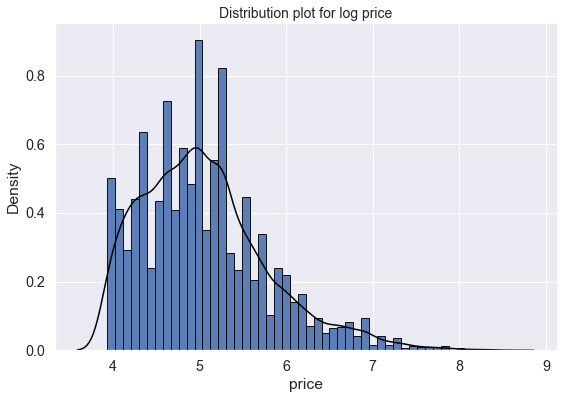

In [109]:
from statlearning import plot_dist
fig, ax = plot_dist(train_FE_dm['price'])
ax.set_title('Distribution plot for log price', fontsize=14)
plt.savefig('Distribution plot for log price.png')
plt.show()

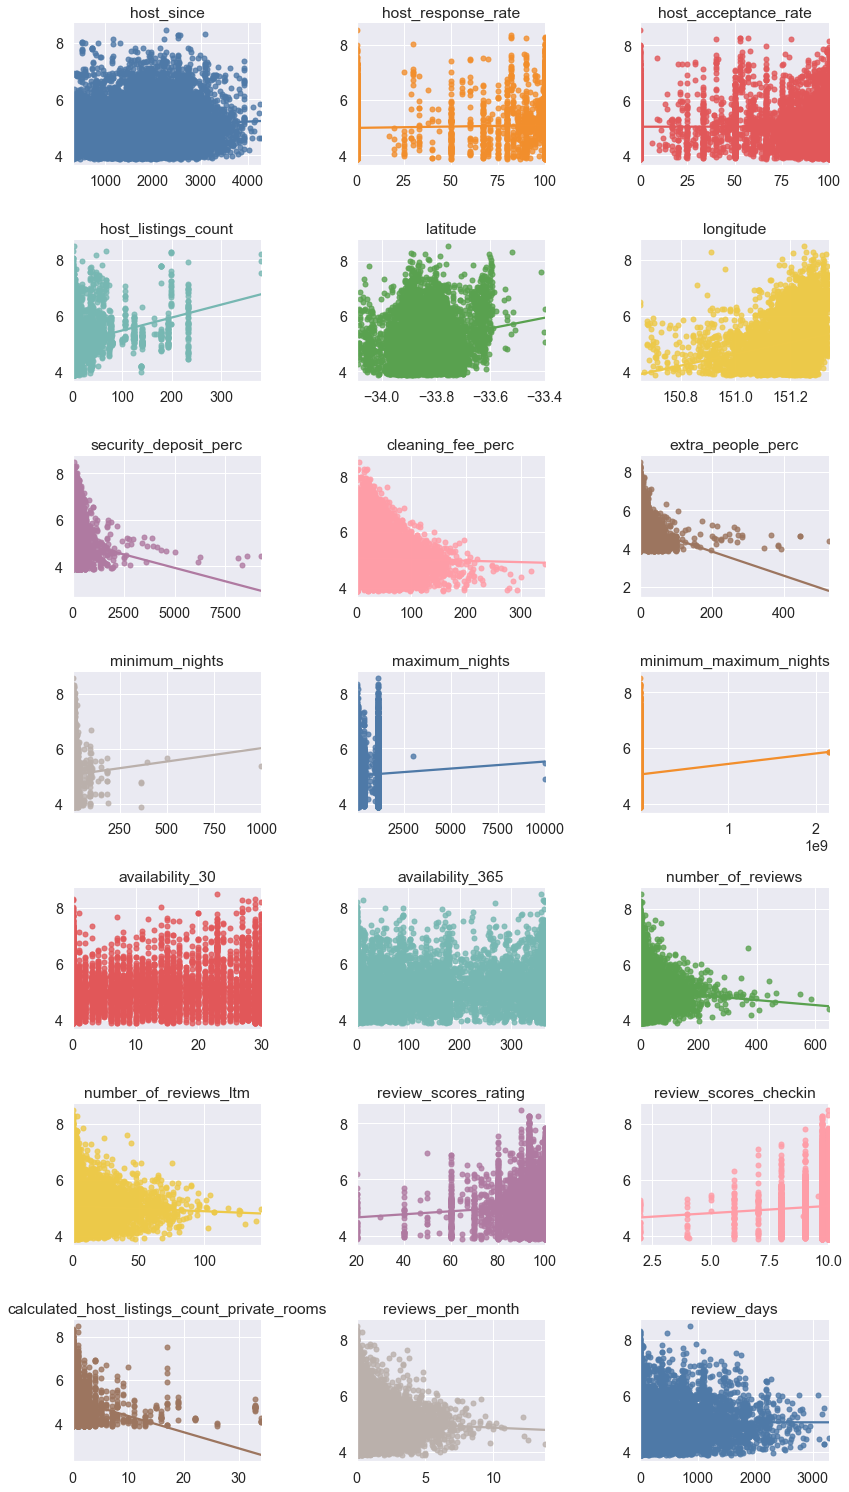

In [110]:
from statlearning import plot_regressions
continuous_reg = continuous.copy()
continuous_reg.remove('price')
plot_regressions(train_FE_dm[continuous_reg],train_FE_dm['price'])
plt.savefig('Collinarity for continuous variables after Feature Engineering (log price)')
plt.show()

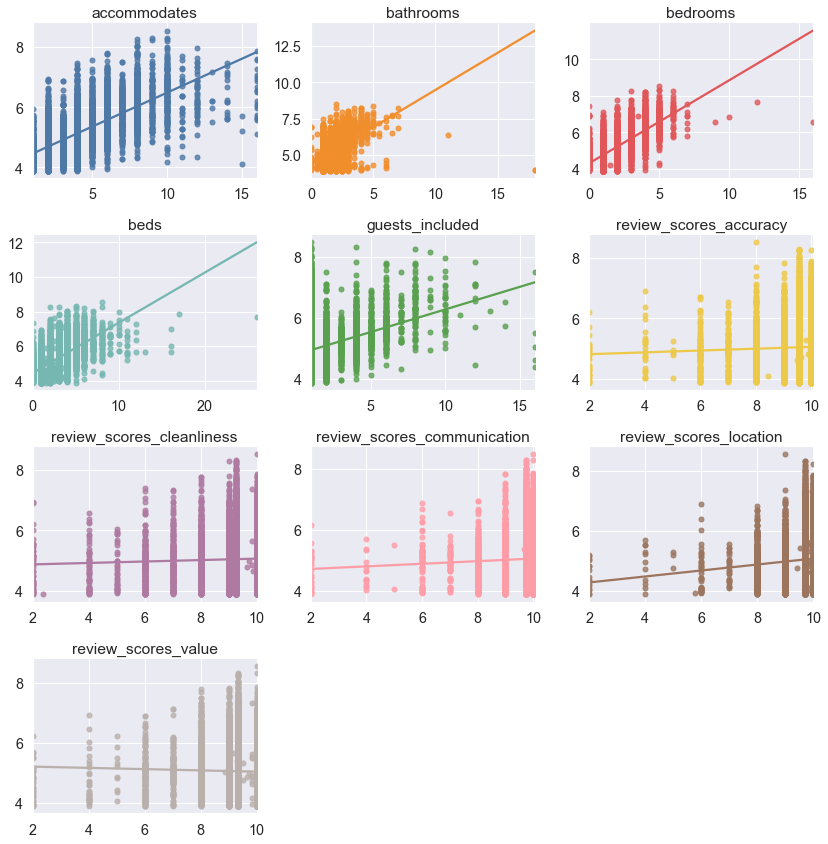

In [111]:
from statlearning import plot_regressions
discrete_reg = discrete.copy()
plot_regressions(train_FE_dm[discrete_reg],train_FE_dm['price'])
plt.savefig('Collinarity for discrete variables after Feature Engineering (log price)')
plt.show()

In [112]:
corr_train_log = train_FE_dm.corr()['price'].sort_values()
train_FE_corr = train_FE_dm[corr_train_log.loc[(corr_train_log>0.05)|(corr_train_log<-0.05)].index]
train_FE_corr

calculated_host_listings_count_private_rooms  extra_people_perc  space  \
0                                                 4                0.0      0   
1                                                 1                0.0      1   
2                                                 0                0.0      0   
3                                                 0               10.0      0   
4                                                 1                0.0      0   
...                                             ...                ...    ...   
10630                                             1                0.0      0   
10631                                             1                0.0      1   
10632                                             1                0.0      0   
10633                                             0                0.0      0   
10634                                             0                0.0      1   

       security_deposit_perc  instant_bookable_t  property_type_Guest suite  \
0                 203.000000                   1                          0   
1                 216.139894                   0                          0   
2                 568.000000                   0                          0   
3                 513.000000                   0                          0   
4                 216.139894                   0                          0   
...                      ...                 ...                        ...   
10630             364.000000                   1                          0   
10631             216.139894                   0                          0   
10632             216.139894                   1                          0   
10633             216.139894                   1                          0   
10634             216.139894                   1                          0   

       house_rules  host_neighbourhood  host_about  interaction  ...  \
0                1                   1           0            0  ...   
1                1                   0           1            0  ...   
2                0                   0           0            0  ...   
3                0                   0           0            0  ...   
4                0                   1           0            1  ...   
...            ...                 ...         ...          ...  ...   
10630            0                   1           1            0  ...   
10631            1                   1           1            1  ...   
10632            0                   1           1            0  ...   
10633            0                   1           1            0  ...   
10634            0                   0           1            1  ...   

       cancellation_policy  longitude  guests_included  neighbourhood_c  \
0                        3  151.10229                1         0.185791   
1                        3  151.23659                1         0.051026   
2                        3  151.16651                1        -0.181912   
3                        3  151.27293                2         0.472328   
4                        1  151.29361                1         0.348696   
...                    ...        ...              ...              ...   
10630                    1  151.26754                1         0.249237   
10631                    1  151.26099                1         0.249237   
10632                    1  151.21030                1         0.094685   
10633                    1  151.27437                1         0.249237   
10634                    1  151.08673                1        -0.276076   

       bathrooms  room_type  beds  bedrooms  accommodates     price  
0            1.0          2   1.0       1.0             2  4.304065  
1            1.0          2   2.0       1.0             2  4.143135  
2            1.0          4   1.0       1.0             2  5.170484  
3            1.0          4   2.0      

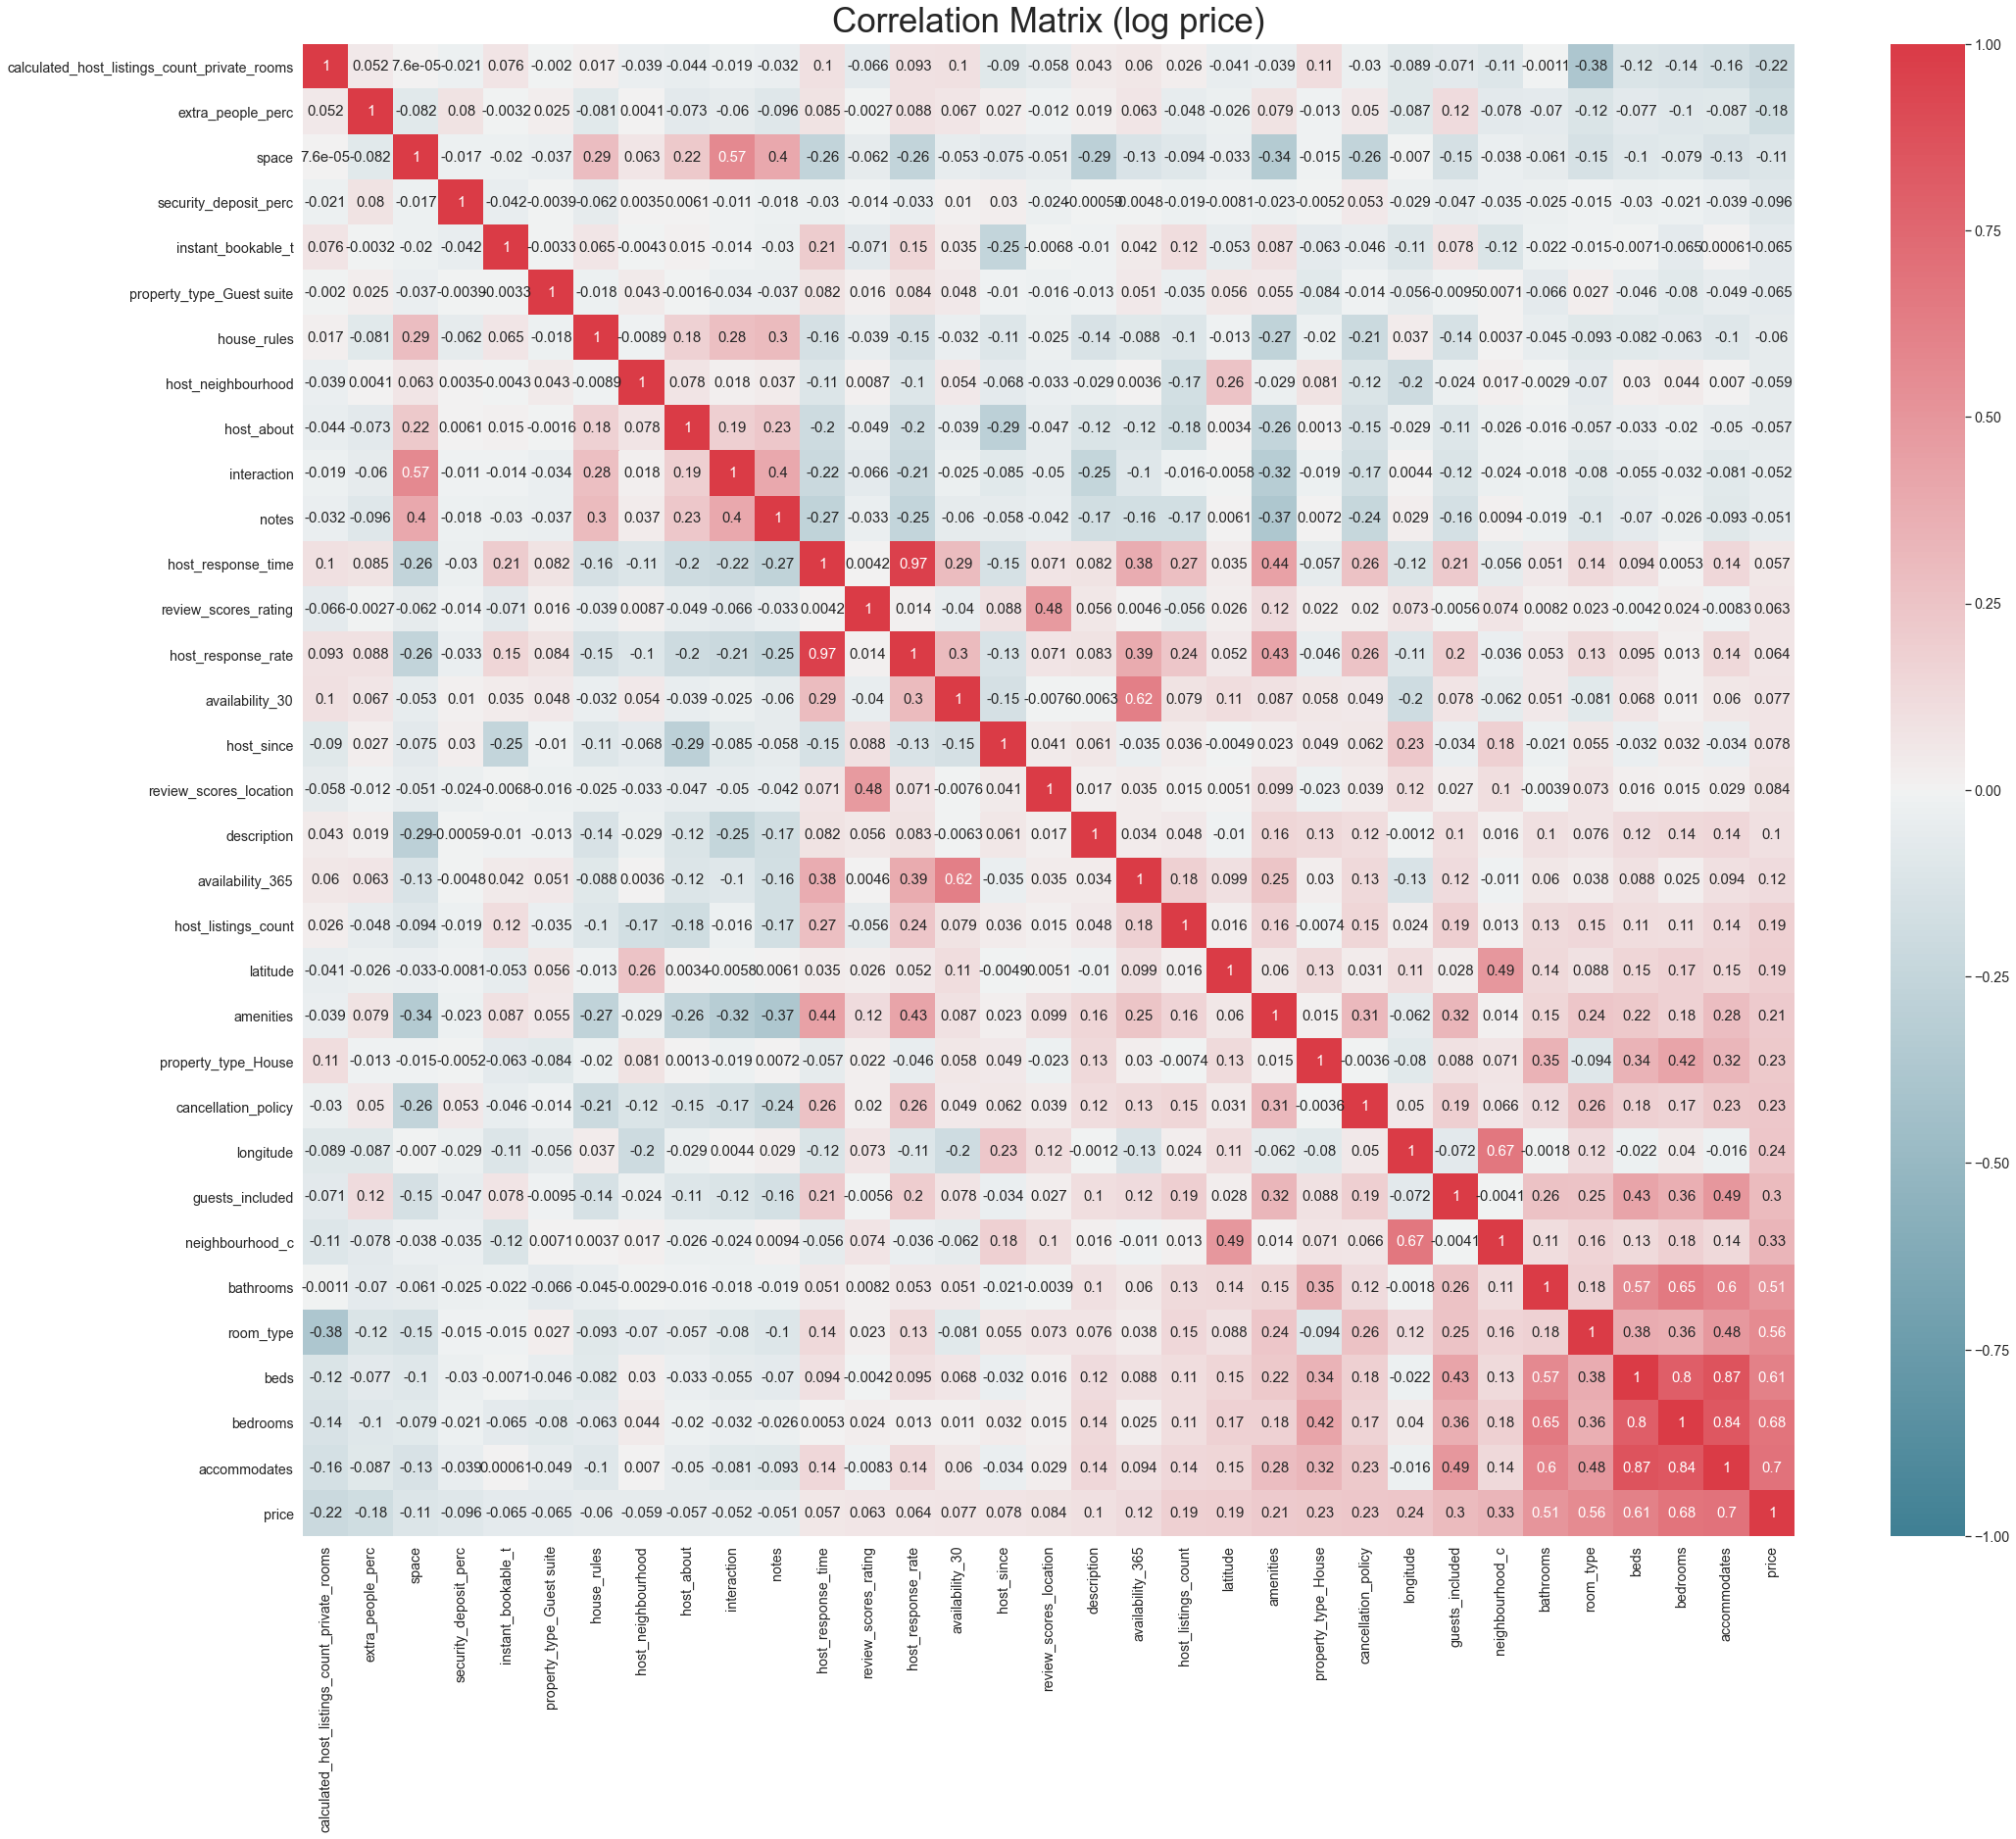

In [113]:
plt.figure(figsize=(35,28))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

heatmap=sns.heatmap(train_FE_corr.corr(), square = True, annot = True,cmap = cmap,vmin=-1, vmax=1, center= 0,annot_kws={"size":15})
heatmap.set_title('Correlation Matrix (log price)', fontdict={'fontsize':35}, pad=12);

plt.savefig('correlation matrix (log price).png')
plt.show()

### 3.4.1 Dropping outliers based on regression plot with log price

In [114]:
print(train_FE_dm.shape)
train_no=train_FE_dm[-((train_FE_dm['minimum_nights']>400)
                           |(train_FE_dm['maximum_nights']>2000)
                           |(train_FE_dm['minimum_maximum_nights']>2*10**9)
                           |(train_FE_dm['bathrooms']>10)
                           |(train_FE_dm['bedrooms']>7.5)
                           |(train_FE_dm['beds']>15)
                          )]
print(train_no.shape)

(10635, 57)
(10617, 57)


### 3.4.2 Dropping multicollinearity features based on log correlation matrix

In [115]:
#accomodates,bedrooms,beds & bathrooms
#host_response_rate & host_response_time (0.97)

print(train_no.shape)
train_nm=train_no.drop(['bedrooms','beds','bathrooms',
                        'host_response_time',
                       ],axis=1)
test_nm=test_FE_dm.drop(['bedrooms','beds','bathrooms',
                        'host_response_time',
                      ],axis=1)
print(train_nm.shape)

(10617, 57)
(10617, 53)


### 3.4.3 Data transforming and scaling

In [116]:
X_train_original=train_nm.drop(['price'],axis=1)
Y_train_logprice=train_nm['price']
X_test_original=test_nm

#### log transformation for positive skewness

In [117]:
#latitude < 0 and skewness > 0
X_train_original['latitude']=-X_train_original['latitude']
X_test_original['latitude']=-X_test_original['latitude']

In [118]:
continuous_new = []
discrete_new = []
dummy_new = []

for i in X_train_original:
    if X_train_original[i].value_counts().shape[0]>20:
        continuous_new.append(i)
    elif X_train_original[i].value_counts().shape[0]<=2:
        dummy_new.append(i)
    else:
        discrete_new.append(i)
print('continuous_variables:',continuous)
print('---------------------------------------------------------------------')
print('discrete_variables:',discrete)
print('----------------------------------------------------------------------')
print('dummy_variables:',dummy)

continuous_variables: ['host_since', 'host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'latitude', 'longitude', 'security_deposit_perc', 'cleaning_fee_perc', 'extra_people_perc', 'minimum_nights', 'maximum_nights', 'minimum_maximum_nights', 'availability_30', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating', 'review_scores_checkin', 'calculated_host_listings_count_private_rooms', 'reviews_per_month', 'price', 'review_days']
---------------------------------------------------------------------
discrete_variables: ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_communication', 'review_scores_location', 'review_scores_value']
----------------------------------------------------------------------
dummy_variables: ['space', 'notes', 'access', 'interaction', 'house_rules', 'host_about', 'host_neighbourhood']


In [119]:
# find variables whose skewness > 0 
a=X_train_original[continuous_new+discrete_new].skew()>0
positive_skew=[a.index[i] for i in range(len(a)) if a[i] == True]

In [120]:
X_train_original[positive_skew]=np.log1p(X_train_original[positive_skew]) #when x=0, log1p(x)=log(x+1)
X_train_log=X_train_original.copy()

In [121]:
X_test_original[positive_skew]=np.log1p(X_test_original[positive_skew])
X_test_log=X_test_original.copy()

#### Standardisation

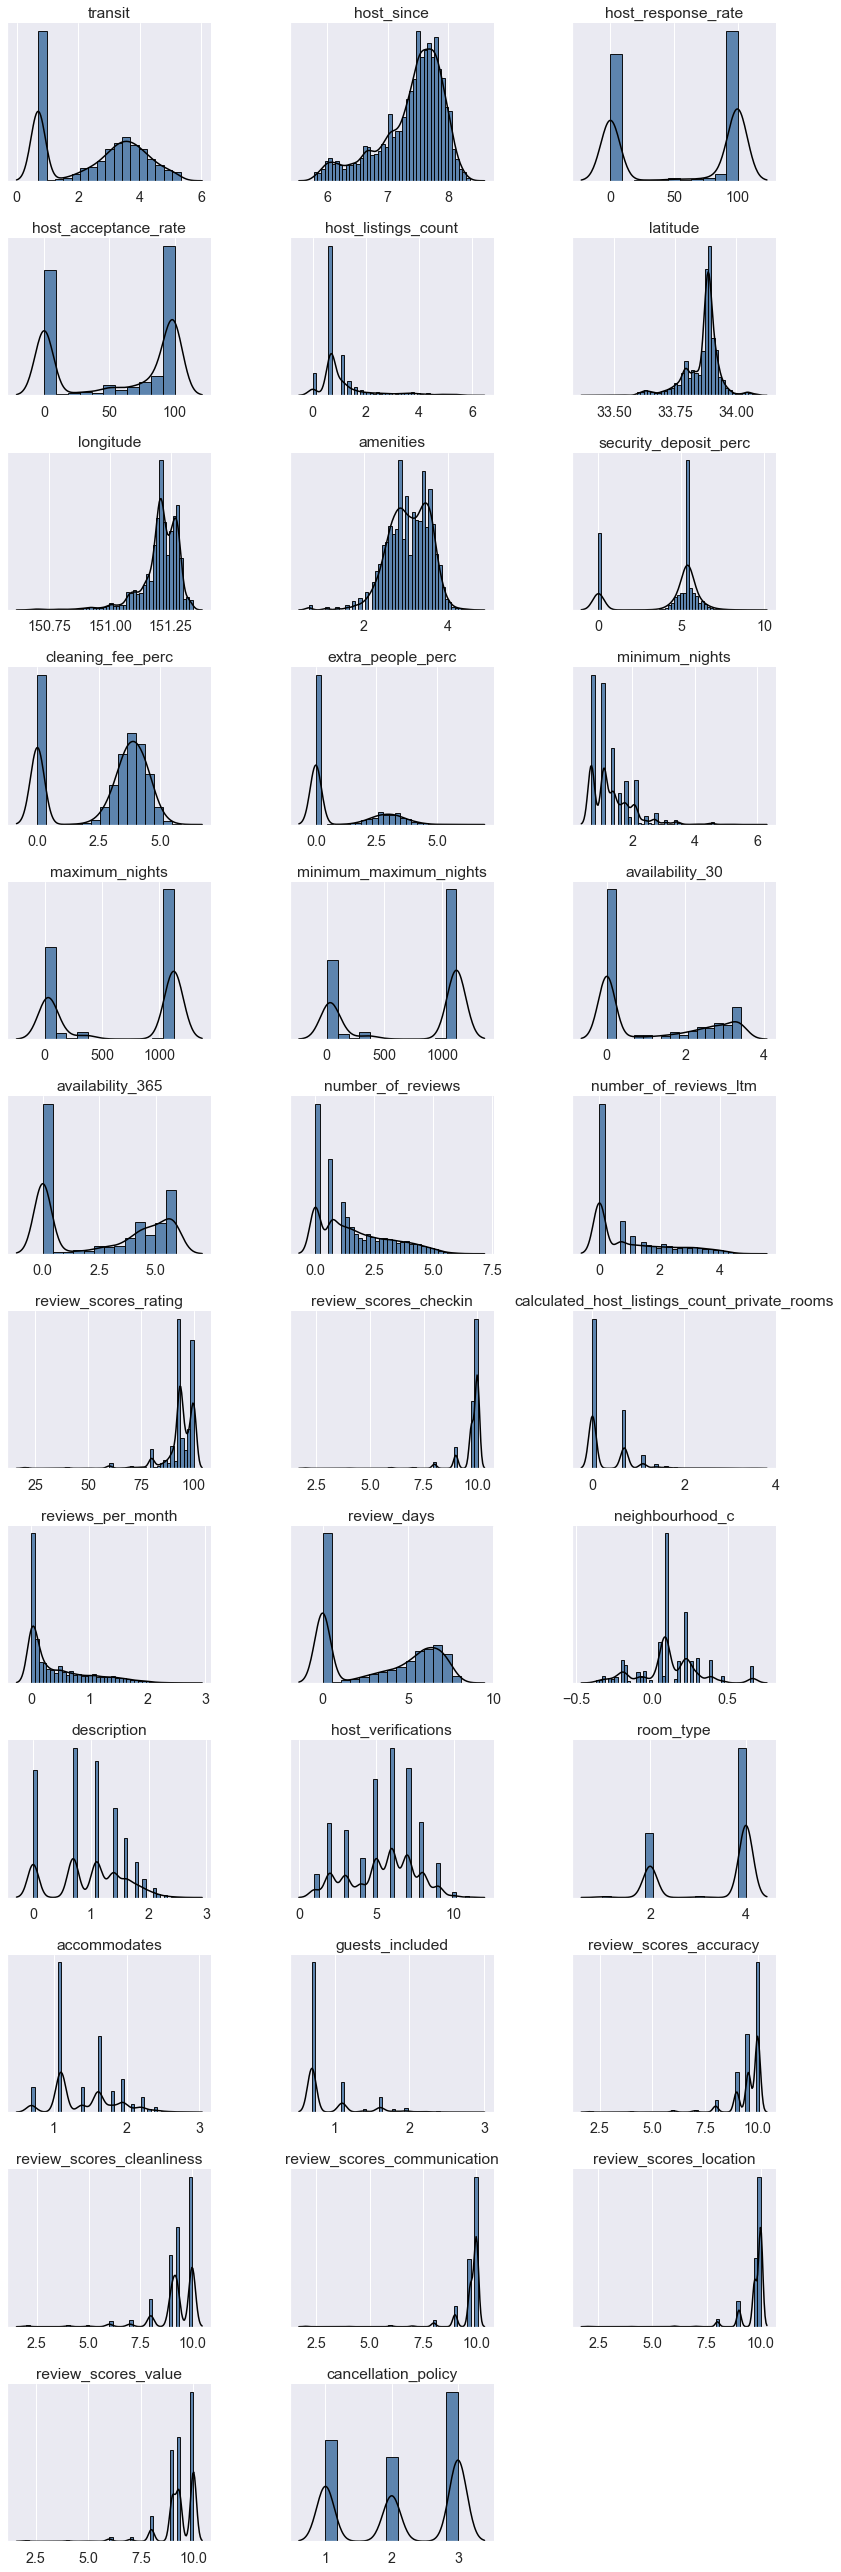

In [122]:
from statlearning import plot_dists
plot_dists(X_train_log[continuous_new+discrete_new])
plt.savefig('Distributions for continous variables after transformation.png')
plt.show()

In [123]:
X_train_log_std=X_train_log.copy()
for i in continuous_new+discrete_new:
    X_train_log_std[i]=(X_train_log_std[i]-X_train_log_std[i].mean())/X_train_log_std[i].std()

In [124]:
X_test_log_std=X_test_log.copy()
for i in continuous_new+discrete_new:
    X_test_log_std[i]=(X_test_log_std[i]-X_train_log[i].mean())/X_train_log[i].std()

# 4. Model Estimation

## 4.1 OLS - Benchmark 
(High interpretability)

In [125]:
from sklearn.linear_model import LinearRegression
model_ols=LinearRegression(fit_intercept = True) #let model have intercept
model_ols.fit(X_train_log_std,Y_train_logprice)

LinearRegression()

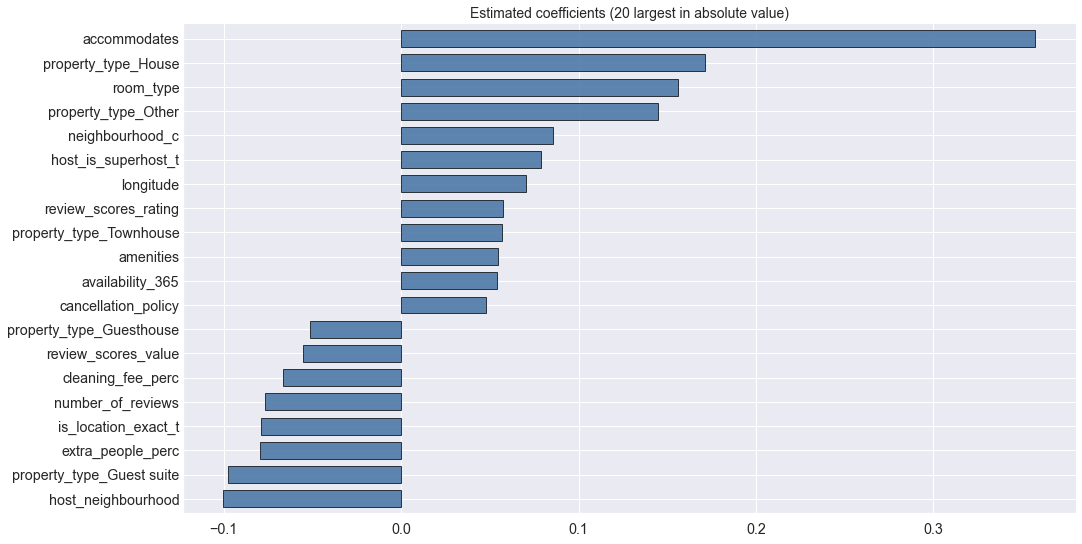

In [126]:
from statlearning import plot_coefficients
plot_coefficients(model_ols,X_train_log_std.columns)
plt.savefig('Estimated coefficients - OLS')
plt.show()

### 4.1.1 Ridge regression

In [127]:
from sklearn.linear_model import RidgeCV
#shrinkage: shrink coefficients

In [128]:
%%time
alpha=list(np.logspace(-15,15,151,base=2))
ridge=RidgeCV(alphas=alpha)#select alpha
ridge.fit(X_train_log_std,Y_train_logprice)

Wall time: 562 ms


RidgeCV(alphas=array([3.05175781e-05, 3.50554918e-05, 4.02681858e-05, 4.62559987e-05,
       5.31341897e-05, 6.10351562e-05, 7.01109836e-05, 8.05363715e-05,
       9.25119975e-05, 1.06268379e-04, 1.22070312e-04, 1.40221967e-04,
       1.61072743e-04, 1.85023995e-04, 2.12536759e-04, 2.44140625e-04,
       2.80443934e-04, 3.22145486e-04, 3.70047990e-04, 4.25073517e-04,
       4.88281250e-04, 5.60887869e-0...
       8.91443777e+02, 1.02400000e+03, 1.17626712e+03, 1.35117610e+03,
       1.55209376e+03, 1.78288755e+03, 2.04800000e+03, 2.35253423e+03,
       2.70235220e+03, 3.10418753e+03, 3.56577511e+03, 4.09600000e+03,
       4.70506846e+03, 5.40470440e+03, 6.20837506e+03, 7.13155021e+03,
       8.19200000e+03, 9.41013692e+03, 1.08094088e+04, 1.24167501e+04,
       1.42631004e+04, 1.63840000e+04, 1.88202738e+04, 2.16188176e+04,
       2.48335002e+04, 2.85262009e+04, 3.27680000e+04]))

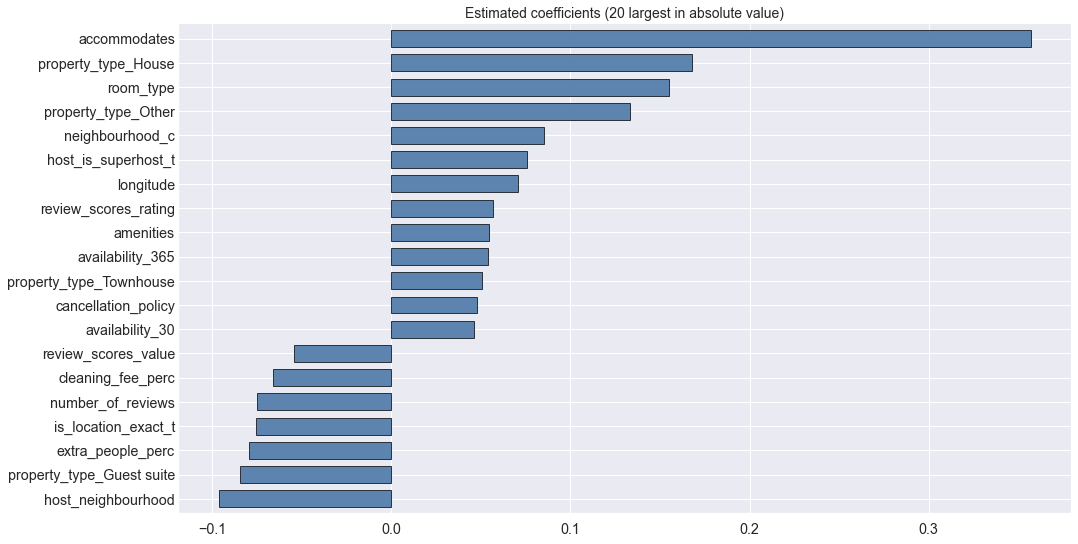

In [129]:
plot_coefficients(ridge,X_train_log_std.columns)
plt.savefig('Estimated coefficients - Ridge')
plt.show()
#not much shrinkage，since the original coefficients are relatively small

### 4.1.2 Lasso regression

In [130]:
from sklearn.linear_model import LassoCV
#shrinkage: shrink coefficients
#feature selection (coefficient can be zero)

In [131]:
lasso=LassoCV(cv=5)
lasso.fit(X_train_log_std,Y_train_logprice)

LassoCV(cv=5)

In [132]:
len(X_train_log_std.columns)

52

In [133]:
len(X_train_log_std.columns)-np.sum(lasso.coef_==0.00)

47

In [134]:
np.sum(lasso.coef_==0.00) #delete five features

5

In [135]:
lasso_coef=pd.DataFrame(np.c_[X_train_log_std.columns,lasso.coef_],columns=['features','coef'])
lasso_coef

features        coef
0                                          space  -0.0385365
1                                    description  0.00217924
2                                          notes          -0
3                                        transit  -0.0129136
4                                         access  0.00444142
5                                    interaction  -0.0104918
6                                    house_rules          -0
7                                     host_since   0.0249285
8                                     host_about -0.00773255
9                             host_response_rate -0.00362217
10                          host_acceptance_rate  -0.0209141
11                            host_neighbourhood   -0.093379
12                           host_listings_count   0.0183975
13                            host_verifications -0.00587802
14                                      latitude -0.00778911
15                                     longitude   0.0707062
16                                     room_type    0.153545
17                                  accommodates    0.359785
18                                     amenities    0.053474
19                         security_deposit_perc  -0.0223098
20                             cleaning_fee_perc  -0.0651916
21                               guests_included    0.028039
22                             extra_people_perc  -0.0789459
23                                minimum_nights -0.00950872
24                                maximum_nights   0.0220298
25                        minimum_maximum_nights  -0.0180446
26                               availability_30   0.0457211
27                              availability_365   0.0534064
28                             number_of_reviews  -0.0765985
29                         number_of_reviews_ltm  -0.0357627
30                          review_scores_rating   0.0549598
31                        review_scores_accuracy          -0
32                     review_scores_cleanliness   0.0149952
33                         review_scores_checkin   0.0057021
34                   review_scores_communication  -0.0092334
35                        review_scores_location   0.0212124
36                           review_scores_value  -0.0534389
37                           cancellation_policy    0.047461
38  calculated_host_listings_count_private_rooms  -0.0367923
39                             reviews_per_month   -0.030101
40                                   review_days -0.00268081
41                               neighbourhood_c   0.0855195
42                           host_is_superhost_t   0.0711573
43                      host_identity_verified_t          -0
44                           is_location_exact_t  -0.0726245
45                     property_type_Condominium          -0
46                     property_type_Guest suite  -0.0686287
47                      property_type_Guesthouse  -0.0123439
48                           property_type_House     0.16756
49                           property_type_Other    0.133931
50                       property_type_Townhouse   0.0421529
51                            instant_bookable_t  -0.0157194

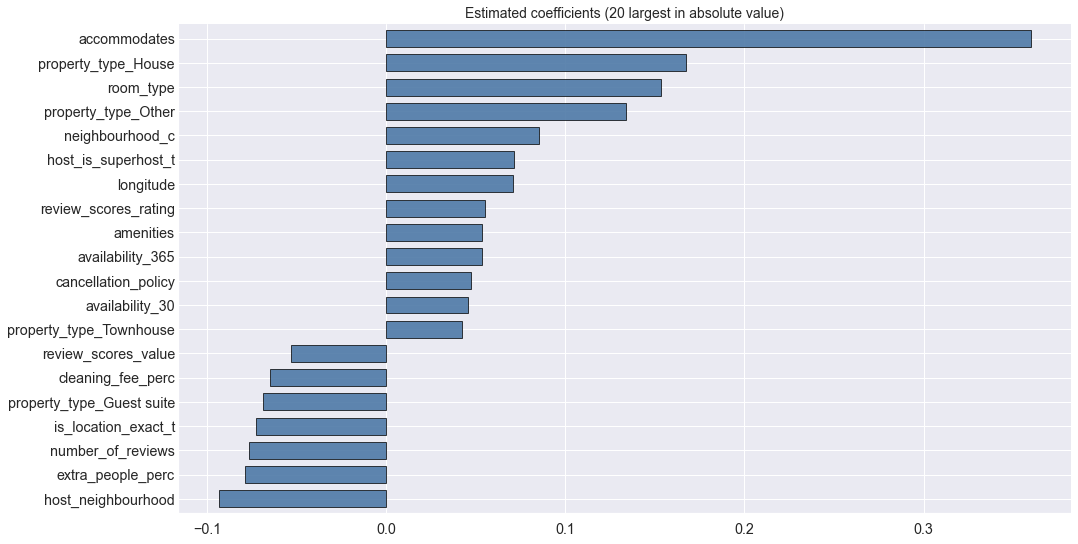

In [136]:
plot_coefficients(lasso,X_train_log_std.columns)
plt.savefig('Estimated coefficients - Lasso')
plt.show()

### 4.1.3 Elastic net

In [137]:
from sklearn.linear_model import ElasticNetCV

enet = ElasticNetCV(l1_ratio=[0.01, 0.1, 0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99],cv=5)
enet.fit(X_train_log_std,Y_train_logprice)

ElasticNetCV(cv=5,
             l1_ratio=[0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99])

In [138]:
#the weight of Lasso
enet.l1_ratio_

0.99

In [139]:
len(X_train_log_std.columns)-np.sum(enet.coef_==0.00)

47

In [140]:
enet_coef=pd.DataFrame(np.c_[X_train_log_std.columns,enet.coef_],columns=['features','coef'])
enet_coef
#nearly same as Lasso

features        coef
0                                          space  -0.0385348
1                                    description  0.00217974
2                                          notes          -0
3                                        transit  -0.0129132
4                                         access  0.00444088
5                                    interaction  -0.0104918
6                                    house_rules          -0
7                                     host_since   0.0249283
8                                     host_about -0.00773267
9                             host_response_rate -0.00362159
10                          host_acceptance_rate  -0.0209136
11                            host_neighbourhood  -0.0933722
12                           host_listings_count   0.0183985
13                            host_verifications -0.00587817
14                                      latitude -0.00778907
15                                     longitude   0.0707063
16                                     room_type    0.153543
17                                  accommodates    0.359784
18                                     amenities   0.0534739
19                         security_deposit_perc  -0.0223095
20                             cleaning_fee_perc  -0.0651909
21                               guests_included   0.0280398
22                             extra_people_perc  -0.0789461
23                                minimum_nights -0.00950832
24                                maximum_nights   0.0220296
25                        minimum_maximum_nights  -0.0180445
26                               availability_30    0.045721
27                              availability_365   0.0534064
28                             number_of_reviews  -0.0765948
29                         number_of_reviews_ltm  -0.0357625
30                          review_scores_rating   0.0549587
31                        review_scores_accuracy          -0
32                     review_scores_cleanliness   0.0149951
33                         review_scores_checkin  0.00570225
34                   review_scores_communication -0.00923308
35                        review_scores_location   0.0212122
36                           review_scores_value  -0.0534378
37                           cancellation_policy   0.0474609
38  calculated_host_listings_count_private_rooms  -0.0367927
39                             reviews_per_month  -0.0301028
40                                   review_days -0.00268309
41                               neighbourhood_c   0.0855194
42                           host_is_superhost_t   0.0711521
43                      host_identity_verified_t          -0
44                           is_location_exact_t  -0.0726183
45                     property_type_Condominium          -0
46                     property_type_Guest suite  -0.0686125
47                      property_type_Guesthouse  -0.0123427
48                           property_type_House    0.167554
49                           property_type_Other    0.133911
50                       property_type_Townhouse   0.0421445
51                            instant_bookable_t  -0.0157193

## 4.2 Tree-based method

### Random forest

In [141]:
# Compared to Bagging , random forest can diversify the trees
from sklearn.model_selection import RandomizedSearchCV #Tuning parameter selection
from sklearn.ensemble import RandomForestRegressor

In [142]:
%%time
model_RF = RandomForestRegressor()

tuning_parameters={
    'n_estimators':[250,500,750,1000,1500],
    'min_samples_leaf':[1,5,10,20],
    'max_depth':np.arange(1,X_train_log.shape[1])
    }

Forest=RandomizedSearchCV(model_RF,tuning_parameters,
                          n_iter=16,cv=5,return_train_score=False,
                          n_jobs=-1,random_state=20)

Forest.fit(X_train_log,Y_train_logprice) #since tree-based methods are not sensitive to distribution or scale

Forest_be=Forest.best_estimator_
print('Best parameters for randomised forest:',Forest.best_params_,'\n')

Best parameters for randomised forest: {'n_estimators': 500, 'min_samples_leaf': 1, 'max_depth': 49} 

Wall time: 8min 19s


In [143]:
Forest_be=Forest.best_estimator_
Forest_be

RandomForestRegressor(max_depth=49, n_estimators=500)

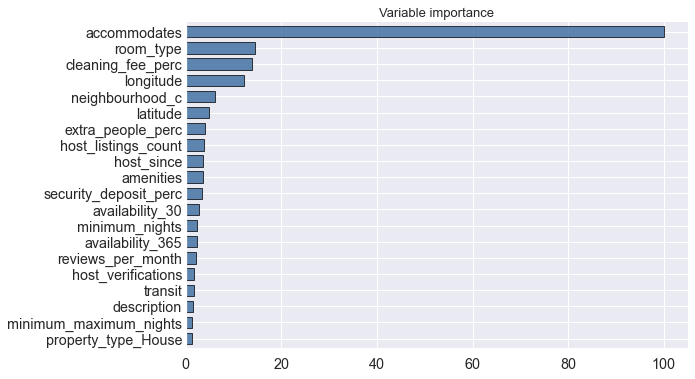

In [144]:
from statlearning import plot_feature_importance
plot_feature_importance(Forest_be,labels=X_train_log.columns)
plt.savefig('Variable importance - Random forest')
plt.show()

### 4.2.1 Xgboost

In [145]:
import xgboost as xgb

In [146]:
%%time

model_xgb = xgb.XGBRegressor(objective='reg:squarederror',reg_lambda=0.5)

tuning_parameters={
    'learning_rate':[0.01,0.05,0.1],
    'n_estimators':[250,500,750,1500,2000],
    'max_depth':[2,4,6,8],
    'subsample':[0.6,0.8,1.0]
    }

xbst=RandomizedSearchCV(model_xgb,tuning_parameters,
                          n_iter=32,cv=5,n_jobs=-1,random_state=87)
xbst.fit(X_train_log,Y_train_logprice)

print('Best parameters for Xgboost:',xbst.best_params_,'\n')

Best parameters for Xgboost: {'subsample': 0.6, 'n_estimators': 1500, 'max_depth': 8, 'learning_rate': 0.01} 

Wall time: 7min 9s


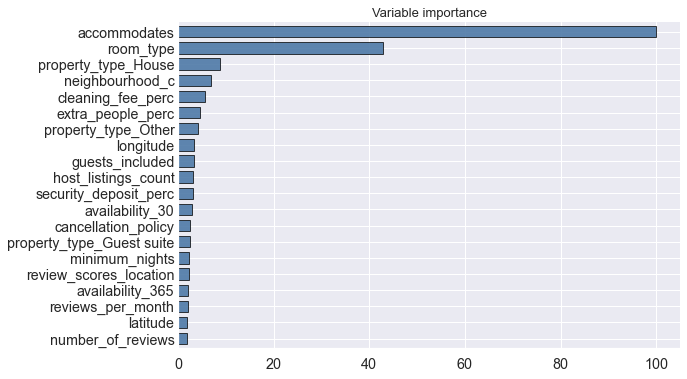

In [147]:
xbst_be=xbst.best_estimator_
from statlearning import plot_feature_importance
plot_feature_importance(xbst_be,labels=X_train_log.columns)
plt.savefig('Variable importance - Xgboost')
plt.show()

## 5. Model Stacking

### first attempt

In [148]:
from mlxtend.regressor import StackingCVRegressor

In [149]:
Forest_be=RandomForestRegressor(max_depth=46, n_estimators=1000,random_state=10)

In [150]:
%%time

models=[lasso,ridge,Forest_be]

stack = StackingCVRegressor(regressors=models,meta_regressor=LinearRegression(),cv=5,n_jobs=-1,random_state=10)
stack.fit(X_train_log.to_numpy(),Y_train_logprice.to_numpy())

Wall time: 3min 32s


StackingCVRegressor(meta_regressor=LinearRegression(), n_jobs=-1,
                    random_state=10,
                    regressors=[LassoCV(cv=5),
                                RidgeCV(alphas=array([3.05175781e-05, 3.50554918e-05, 4.02681858e-05, 4.62559987e-05,
       5.31341897e-05, 6.10351562e-05, 7.01109836e-05, 8.05363715e-05,
       9.25119975e-05, 1.06268379e-04, 1.22070312e-04, 1.40221967e-04,
       1.61072743e-04, 1.85023995e-04, 2.12536759e-...
       2.70235220e+03, 3.10418753e+03, 3.56577511e+03, 4.09600000e+03,
       4.70506846e+03, 5.40470440e+03, 6.20837506e+03, 7.13155021e+03,
       8.19200000e+03, 9.41013692e+03, 1.08094088e+04, 1.24167501e+04,
       1.42631004e+04, 1.63840000e+04, 1.88202738e+04, 2.16188176e+04,
       2.48335002e+04, 2.85262009e+04, 3.27680000e+04])),
                                RandomForestRegressor(max_depth=46,
                                                      n_estimators=1000,
                                                    

In [151]:
%%time
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error

models=['model_ols','lasso','ridge','enet','Forest_be','xbst_be','stack']
model_names=['OLS','Lasso','Ridge','Elastic net','Random Forest','Xgboost','Model Stacking']

scores=[]
for i in models:
    if i in ['model_ols','lasso','ridge','enet']:
        predicted = cross_val_predict(eval(i),X_train_log_std,Y_train_logprice,cv=5,n_jobs=-1)
        score=np.sqrt(mean_squared_error(Y_train_logprice,predicted))
        scores.append(score)
    else:
        predicted = cross_val_predict(eval(i),X_train_log.to_numpy(),
                                      Y_train_logprice.to_numpy(),
                                      cv=5,n_jobs=-1)
        score=np.sqrt(mean_squared_error(Y_train_logprice,predicted))
        scores.append(score)
scores_df=pd.DataFrame(scores,index=model_names,columns=['RMSE'])

Wall time: 8min 20s


In [152]:
scores_df

RMSE
OLS             0.426054
Lasso           0.425990
Ridge           0.426008
Elastic net     0.425997
Random Forest   0.365271
Xgboost         0.333936
Model Stacking  0.361169

### second attempt

In [153]:
%%time

models=[Forest_be,xbst_be]

stack_re = StackingCVRegressor(regressors=models,meta_regressor=LinearRegression(),cv=5,n_jobs=-1,random_state=10)
stack_re.fit(X_train_log.to_numpy(),Y_train_logprice.to_numpy())

Wall time: 4min 29s


StackingCVRegressor(meta_regressor=LinearRegression(), n_jobs=-1,
                    random_state=10,
                    regressors=[RandomForestRegressor(max_depth=46,
                                                      n_estimators=1000,
                                                      random_state=10),
                                XGBRegressor(base_score=0.5, booster='gbtree',
                                             colsample_bylevel=1,
                                             colsample_bynode=1,
                                             colsample_bytree=1, gamma=0,
                                             gpu_id=-1, importance_type='gain',
                                             interaction_constraints='',
                                             learning_rate=0.01,
                                             max_delta_step=0, max_depth=8,
                                             min_child_weight=1, missing=nan,
                            

In [154]:
predicted = cross_val_predict(stack_re,X_train_log.to_numpy(),Y_train_logprice,cv=5,n_jobs=-1)
score=np.sqrt(mean_squared_error(Y_train_logprice,predicted))
score

0.3331665279982488

# Submission

In [155]:
#prediction
y_pred_stackre=stack_re.predict(X_test_log.to_numpy())

submission=pd.DataFrame(np.c_[X_test_log_std.index,np.exp(y_pred_stackre)],
                       columns=['Id','price'])
submission['Id']=submission['Id'].astype(int)

submission.to_csv('retest_model_stacking.csv',index=False)